__Uploading Tensorflow and Keras__

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Project2_training.csv to Project2_training.csv


In [ ]:
import keras as keras

__Importing Packages__

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

__Reading CSV and Normalizing Variables__

In [ ]:
df = pd.read_csv('Project2_training.csv')

In [ ]:
# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [ ]:
df.head()

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price,Call Price
0,1.467892,1,0,0.992653,0.028574,100,0.747693
1,1.258188,1,0,0.995702,0.026482,100,0.580628
2,0.600640,1,0,0.984955,0.029314,100,0.142689
3,1.082254,1,0,0.048974,0.029928,100,0.111967
4,0.992677,1,0,0.120462,0.020081,100,0.053918


## Part A: Question 1

### Shallow Neural Network

Epoch 1/100
38/38 - 1s - loss: 0.2439 - val_loss: 0.0588 - 883ms/epoch - 23ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0534 - val_loss: 0.0509 - 93ms/epoch - 2ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0496 - val_loss: 0.0474 - 95ms/epoch - 2ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0455 - val_loss: 0.0429 - 93ms/epoch - 2ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0403 - val_loss: 0.0370 - 105ms/epoch - 3ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0339 - val_loss: 0.0299 - 102ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0263 - val_loss: 0.0221 - 95ms/epoch - 2ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0187 - val_loss: 0.0150 - 92ms/epoch - 2ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0123 - val_loss: 0.0096 - 105ms/epoch - 3ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0078 - val_loss: 0.0062 - 98ms/epoch - 3ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0052 - val_loss: 0.0043 - 108ms/epoch - 3ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0038 - val_loss: 0.0033 - 92ms/epoch - 2ms/step
Epoch 13/100
38/38 

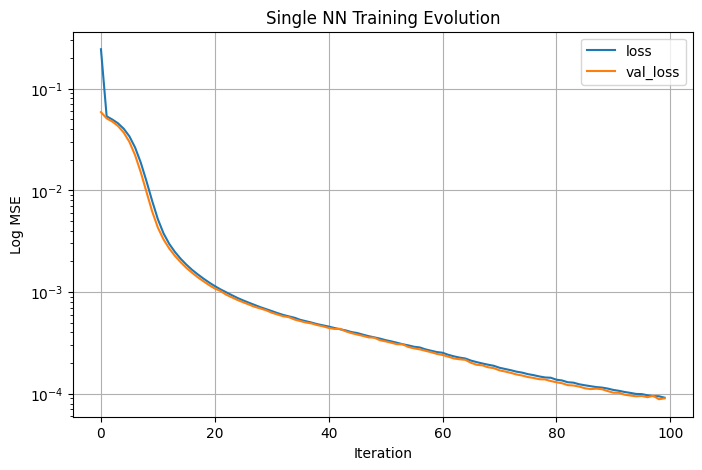

In [ ]:
# for this NN we will define it with 300 neurons
nodes = 300
# initialize the mode as Sequential class - the next steps we will add layers to it
model = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron
model.add(Dense(1))
# we will use our customized activation function
model.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

__Assessing Accuracy of Shallow Neural Network__

In [ ]:
def CheckAccuracy_dict(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)
    print(
    "Mean Squared Error:      ", stats['mse'])

    stats['rmse'] = np.sqrt(stats['mse'])
    print(
    "Root Mean Squared Error: ", stats['rmse'])

    stats['mae'] = np.mean(abs(stats['diff']))
    print(
    "Mean Absolute Error:     ", stats['mae'])

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)
    print(
    "Mean Percent Error:      ", stats['mpe'])

    return stats


def CheckAccuracy_plots(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    # plots
    # mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

19/19 [==============================] - 0s 1ms/step


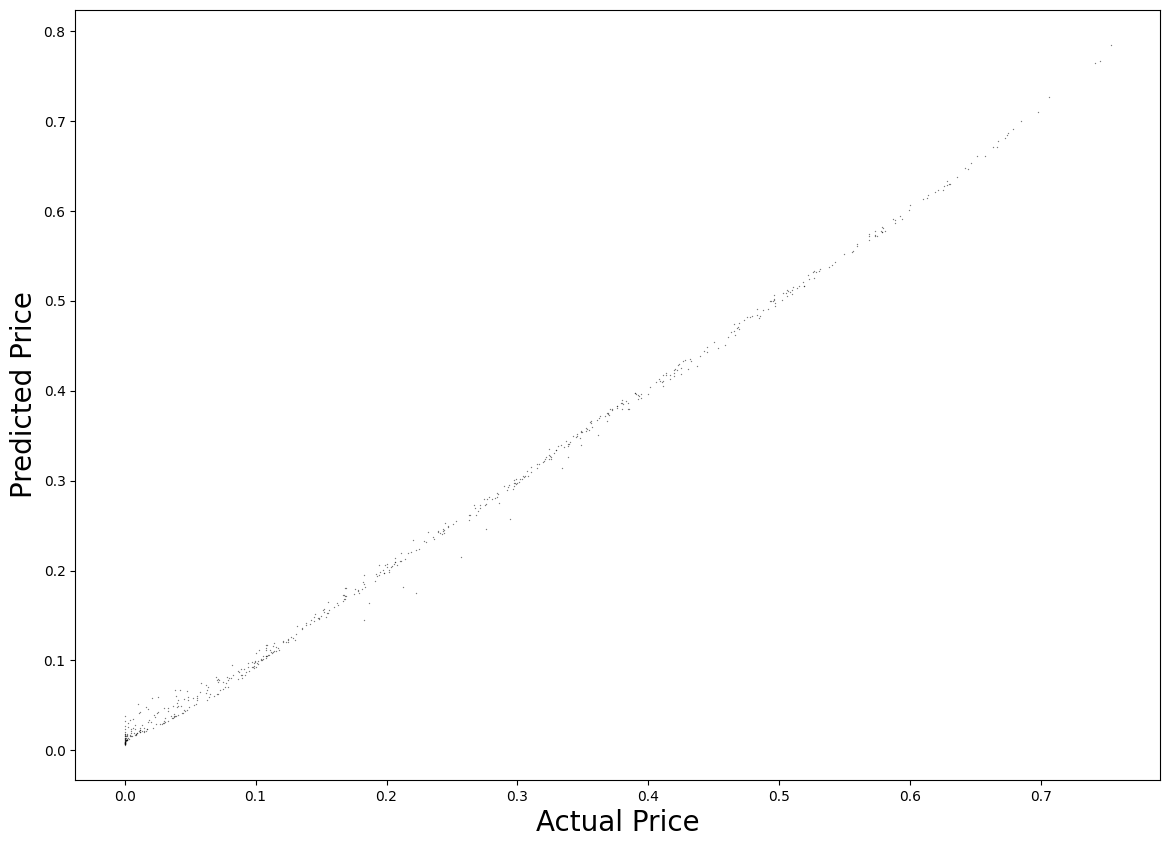

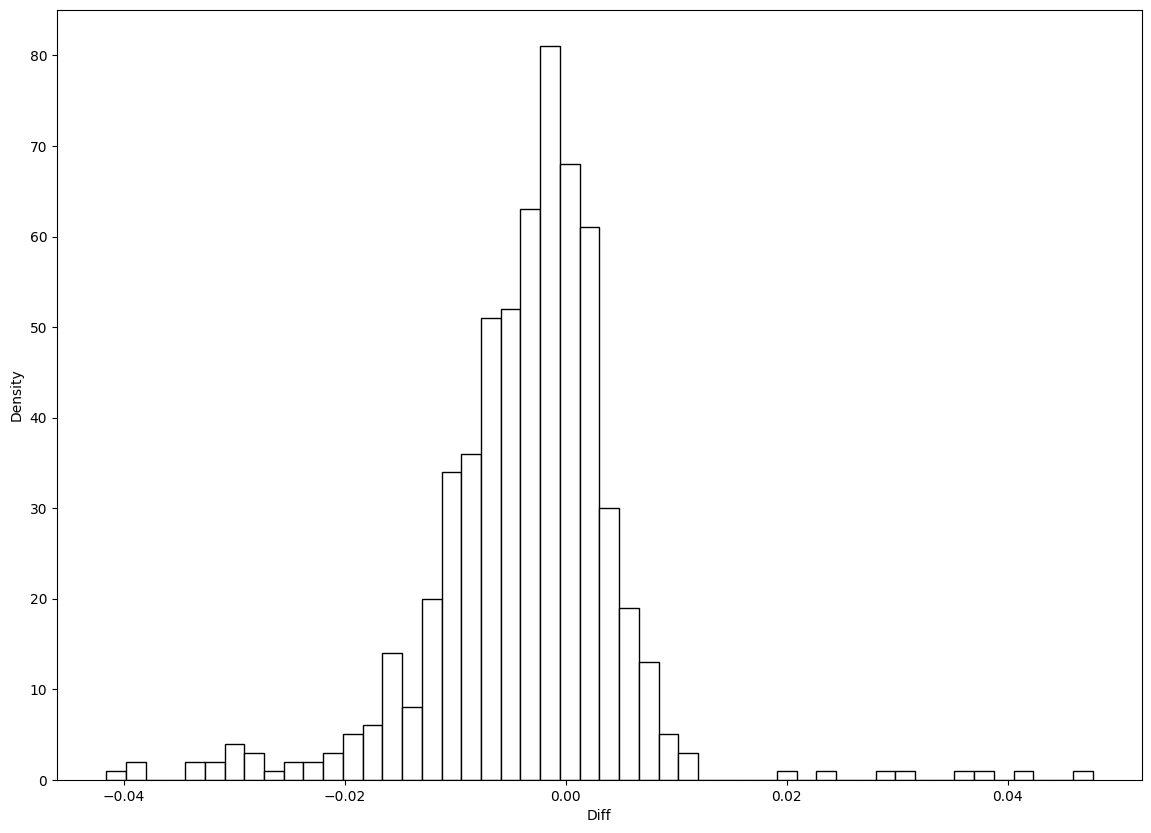

Mean Squared Error:       8.998261502996842e-05
Root Mean Squared Error:  0.009485916667880253
Mean Absolute Error:      0.006369416264447194
Mean Percent Error:       0.03921624712486225


In [ ]:
y1_test_hat = model.predict(X_test)

y1_test_hat = np.squeeze(y1_test_hat)


CheckAccuracy_plots(y_test, y1_test_hat)
s = CheckAccuracy_dict(y_test, y1_test_hat)


In [ ]:
shallow_network = CheckAccuracy_dict(y_test, y1_test_hat)
shallow_network.pop('diff')
shallow_network = {'Shallow Neural Network': shallow_network}

Mean Squared Error:       8.998261502996842e-05
Root Mean Squared Error:  0.009485916667880253
Mean Absolute Error:      0.006369416264447194
Mean Percent Error:       0.03921624712486225


### Deep Neural Network

In [ ]:
# function for creating neural network structure with different number of layers
def NeuralNetwork(layers, nodes_num, act, opt, epoch_nums):
    # initialize our new model as sequential class
    model = Sequential()

    # add the first layer of nodes_num neurons - for the first layer you must declare the number of features through input_dim arguments
    model.add(Dense(nodes_num, activation= act, input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

    for i in range(layers - 1):
        model.add(Dense(nodes_num, activation = act))

    # output layer is the same as the single NN
    model.add(Dense(1))
    model.add(Activation(custom_activation))

    # compile and fit the model
    model.compile(loss='mse', optimizer=opt) # optimizer = 'rmsprop', 'sgd', 'adam'
    history = model.fit(X_train, y_train, batch_size=512, epochs=epoch_nums, validation_split=0.1, verbose=2,
                              validation_data=(X_test, y_test))
    print()
    print(model.summary())

    pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
    plt.title('DNN Training Evolution')
    plt.ylabel('Log MSE')
    plt.xlabel('Iteration')
    plt.grid(True)

    return model

__Assessing Accuracy of Deep Neural Network (with 3 layers of 100 neurons each)__

Epoch 1/100
5/5 - 1s - loss: 0.2896 - val_loss: 0.1108 - 1s/epoch - 202ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0814 - val_loss: 0.0615 - 76ms/epoch - 15ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0607 - val_loss: 0.0608 - 65ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0631 - val_loss: 0.0635 - 65ms/epoch - 13ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0652 - val_loss: 0.0634 - 69ms/epoch - 14ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0641 - val_loss: 0.0609 - 52ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0608 - val_loss: 0.0570 - 49ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0564 - val_loss: 0.0523 - 47ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0513 - val_loss: 0.0476 - 55ms/epoch - 11ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0463 - val_loss: 0.0433 - 67ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0419 - val_loss: 0.0389 - 50ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0372 - val_loss: 0.0340 - 67ms/epoch - 13ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0321 - 

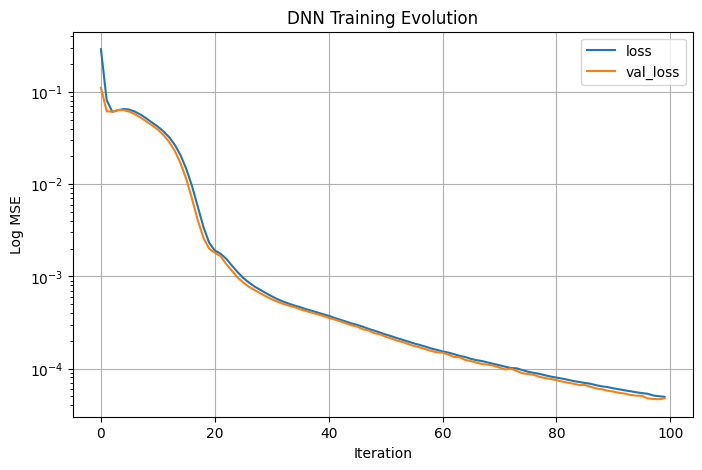

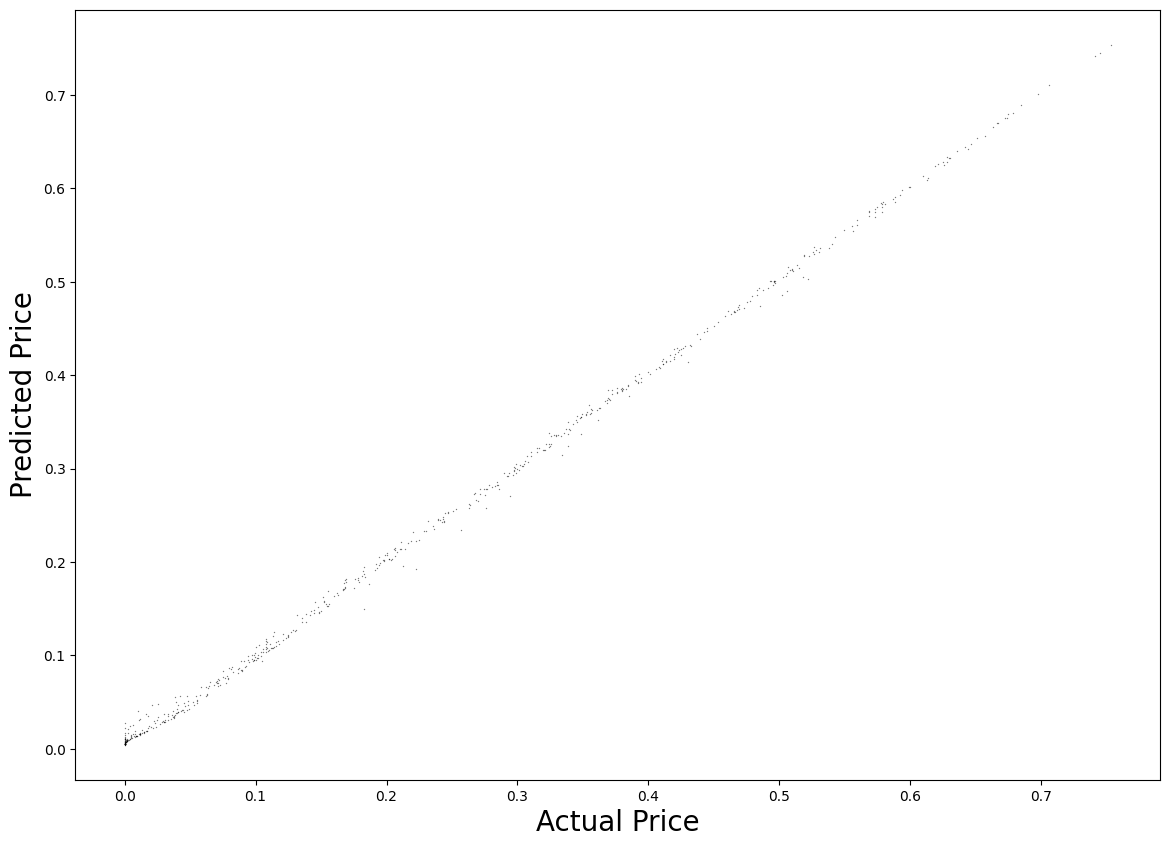

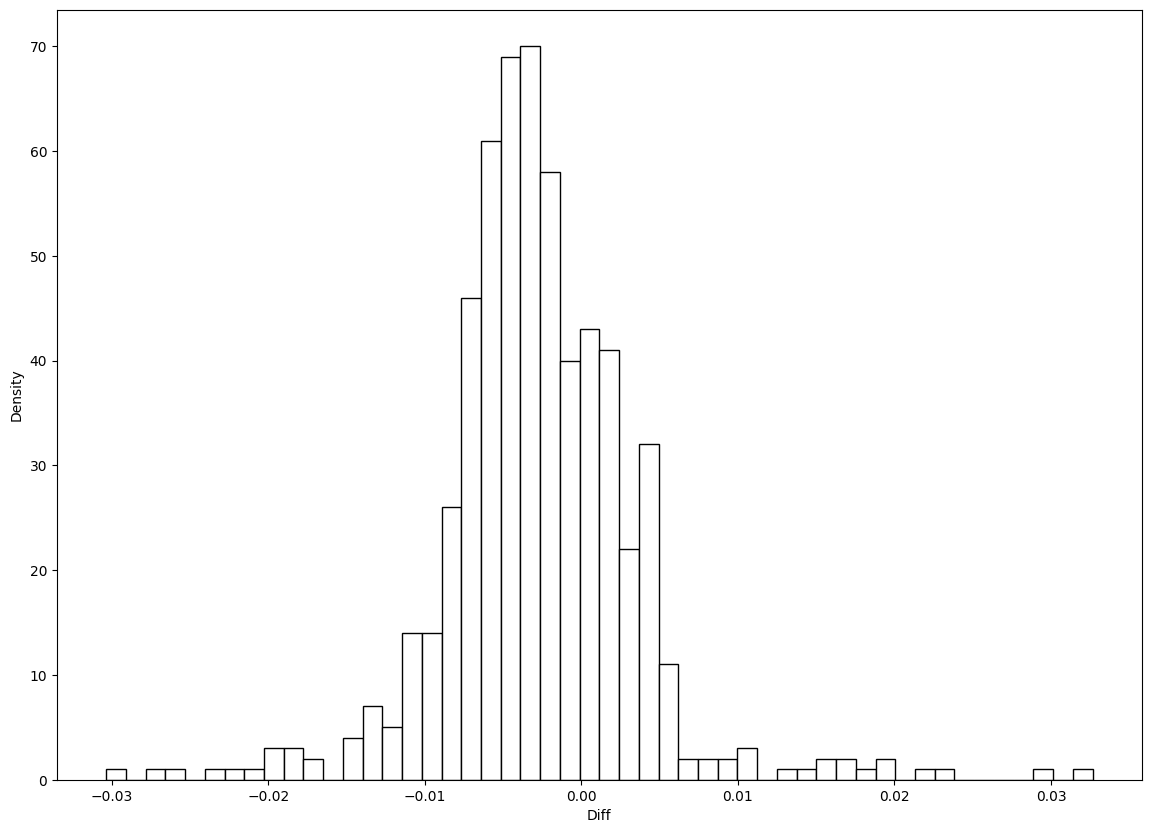

Mean Squared Error:       4.746810285669348e-05
Root Mean Squared Error:  0.006889709925439059
Mean Absolute Error:      0.005127435158156279
Mean Percent Error:       0.028483126777774172


In [ ]:
y2_test_hat = NeuralNetwork(3, 100, 'relu', 'adam', 100).predict(X_test)

y2_test_hat = np.squeeze(y2_test_hat)

CheckAccuracy_plots(y_test, y2_test_hat)
s = CheckAccuracy_dict(y_test, y2_test_hat)

In [ ]:
deep_3_100_relu = CheckAccuracy_dict(y_test, y2_test_hat)
deep_3_100_relu.pop('diff')
deep_3_100_relu = {'DNN (3, 100, Relu)': deep_3_100_relu}

Mean Squared Error:       4.746810285669348e-05
Root Mean Squared Error:  0.006889709925439059
Mean Absolute Error:      0.005127435158156279
Mean Percent Error:       0.028483126777774172


### Deep Neural Network (with 5 layers of 60 neurons each)

__Assessing Accuracy of DNN with 5 layers of 60 neurons each__

Epoch 1/100
5/5 - 1s - loss: 0.4338 - val_loss: 0.2866 - 1s/epoch - 265ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2091 - val_loss: 0.1173 - 65ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0859 - val_loss: 0.0598 - 65ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0582 - val_loss: 0.0592 - 52ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0623 - val_loss: 0.0634 - 66ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0653 - val_loss: 0.0630 - 49ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0632 - val_loss: 0.0585 - 66ms/epoch - 13ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0575 - val_loss: 0.0524 - 66ms/epoch - 13ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0511 - val_loss: 0.0472 - 65ms/epoch - 13ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0462 - val_loss: 0.0437 - 64ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0423 - val_loss: 0.0397 - 51ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0376 - val_loss: 0.0344 - 67ms/epoch - 13ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0324 -

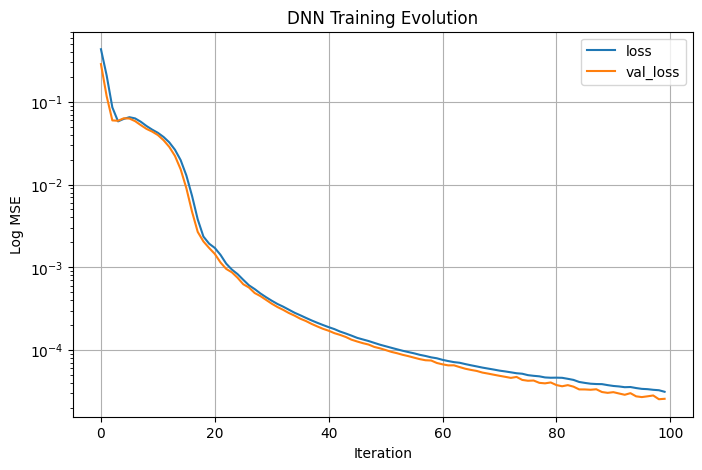

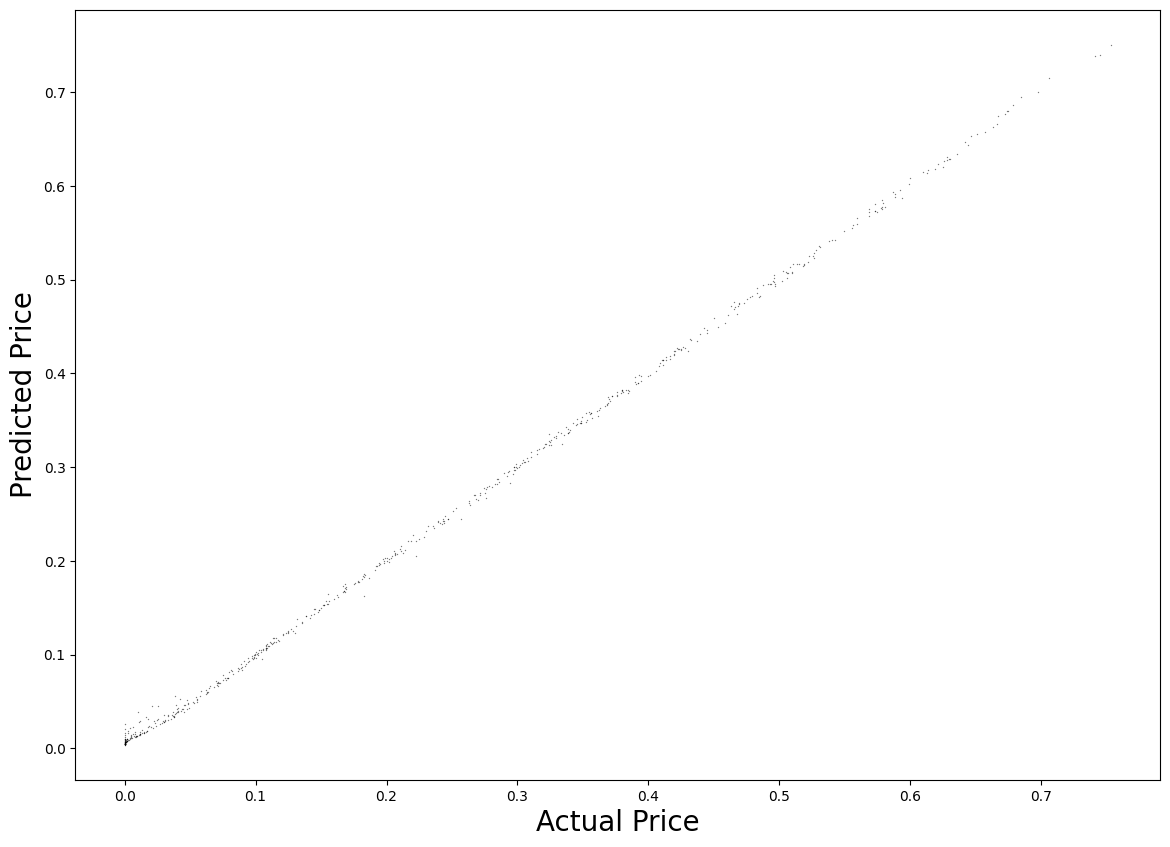

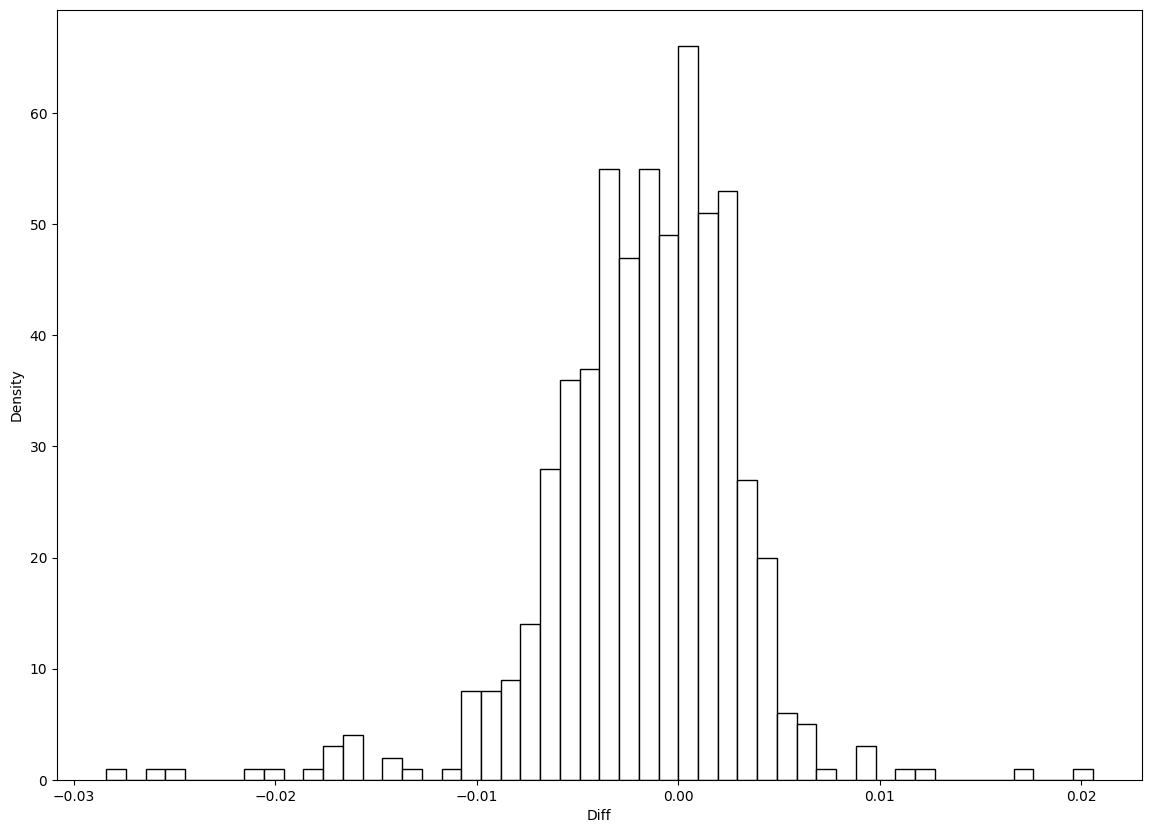

Mean Squared Error:       2.5652257193710795e-05
Root Mean Squared Error:  0.005064805740964878
Mean Absolute Error:      0.0035768872433365366
Mean Percent Error:       0.020938690537905015


{'diff': array([ 1.73848211e-03, -2.70987207e-03, -1.91024421e-03,  4.07837742e-03,
        -8.24982737e-03,  1.87120697e-03, -3.75469171e-03,  2.88131800e-03,
        -3.60357493e-03,  2.40948462e-03, -6.17813718e-03, -5.66754803e-04,
        -2.32635738e-03, -1.53029929e-03, -5.50466522e-03, -4.19772044e-03,
         3.66725155e-03, -6.15951912e-03,  5.44764795e-04, -6.68999934e-03,
         5.47007012e-04,  1.34176223e-03, -2.38112085e-03, -2.35432172e-04,
         6.28292533e-03,  5.16782799e-03,  3.72952630e-04, -1.96990685e-03,
         2.54052434e-03, -5.60913573e-03,  2.72651274e-03,  2.82112383e-03,
        -1.99584662e-03,  1.10645371e-03, -1.55684968e-03, -4.47644683e-04,
        -5.60845919e-03,  3.60374052e-03, -2.43872807e-03,  2.01432844e-03,
        -5.60545607e-03, -6.85134434e-04,  1.94259519e-03, -4.11761914e-03,
         1.89731764e-03,  1.53525710e-03, -5.99078975e-03, -4.96390344e-03,
         7.46488598e-04, -1.86437720e-03, -6.72336174e-03, -1.00609300e-02,
    

In [ ]:
y3_test_hat = NeuralNetwork(5, 60, 'relu', 'adam', 100).predict(X_test)

y3_test_hat = np.squeeze(y3_test_hat)

CheckAccuracy_plots(y_test, y3_test_hat)
CheckAccuracy_dict(y_test, y3_test_hat)

In [ ]:
deep_5_60_relu = CheckAccuracy_dict(y_test, y3_test_hat)
deep_5_60_relu.pop('diff')
deep_5_60_relu = {'DNN (5, 60, Relu)': deep_5_60_relu}
deep_5_60_relu

Mean Squared Error:       2.5652257193710795e-05
Root Mean Squared Error:  0.005064805740964878
Mean Absolute Error:      0.0035768872433365366
Mean Percent Error:       0.020938690537905015


{'DNN (5, 60, Relu)': {'mse': 2.5652257193710795e-05,
  'rmse': 0.005064805740964878,
  'mae': 0.0035768872433365366,
  'mpe': 0.020938690537905015}}

### Comparison of Key Accuracy Stats Across Neural Networks of Varying Layers

In [ ]:
question1 = {**shallow_network, **deep_3_100_relu, **deep_5_60_relu}

df = pd.DataFrame.from_dict(question1)
df

,Shallow Neural Network,"DNN (3, 100, Relu)","DNN (5, 60, Relu)"
mse,0.000090,0.000047,0.000026
rmse,0.009486,0.006890,0.005065
mae,0.006369,0.005127,0.003577
mpe,0.039216,0.028483,0.020939


## Part A: Question 2

### DNN with 5 Layers of 60 Neurons Each (Activation: tanh)

Epoch 1/100
5/5 - 1s - loss: 0.4832 - val_loss: 0.0624 - 1s/epoch - 261ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0553 - val_loss: 0.0558 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0600 - val_loss: 0.0617 - 64ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0643 - val_loss: 0.0628 - 69ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0640 - val_loss: 0.0605 - 66ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0606 - val_loss: 0.0558 - 55ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0549 - val_loss: 0.0495 - 49ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0479 - val_loss: 0.0434 - 68ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0424 - val_loss: 0.0407 - 50ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0406 - val_loss: 0.0411 - 49ms/epoch - 10ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0398 - val_loss: 0.0383 - 72ms/epoch - 14ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0368 - val_loss: 0.0349 - 66ms/epoch - 13ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0340 -

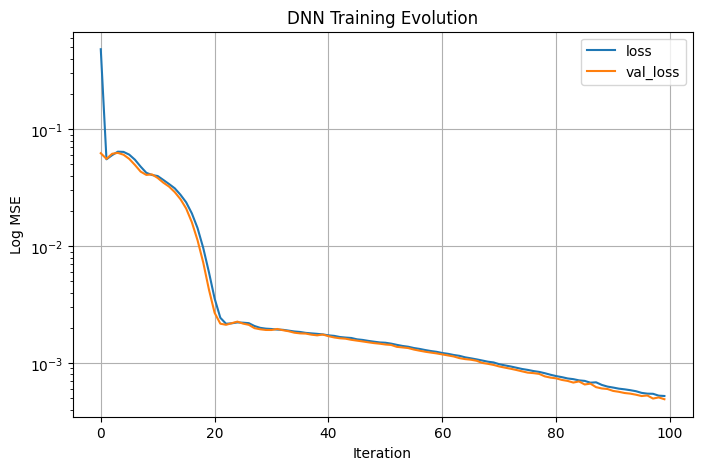

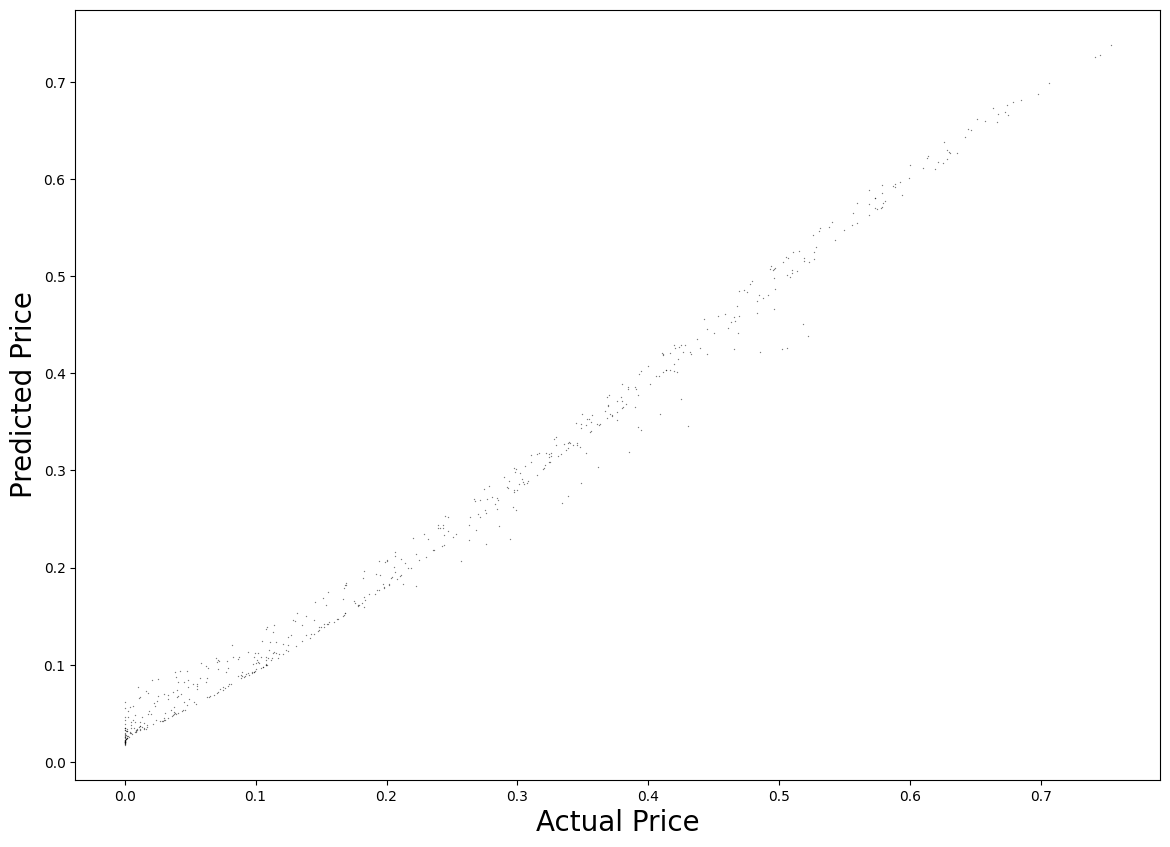

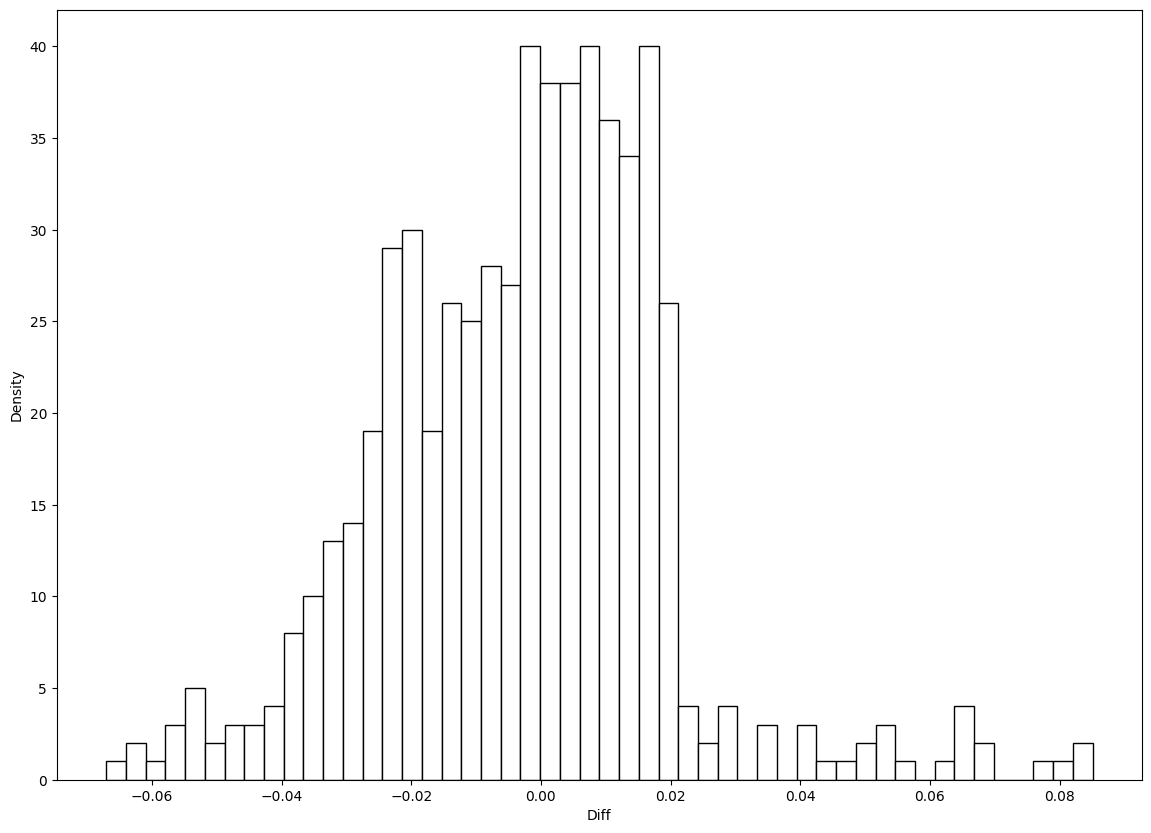

Mean Squared Error:       0.0004912159581407538
Root Mean Squared Error:  0.022163392297677578
Mean Absolute Error:      0.01668714059716934
Mean Percent Error:       0.09162689278243662


In [ ]:
y4_test_hat = NeuralNetwork(5, 60, 'tanh', 'adam', 100).predict(X_test)

y4_test_hat = np.squeeze(y4_test_hat)

CheckAccuracy_plots(y_test, y4_test_hat)
s = CheckAccuracy_dict(y_test, y4_test_hat)

In [ ]:
deep_5_60_tanh = CheckAccuracy_dict(y_test, y4_test_hat)
deep_5_60_tanh.pop('diff')
deep_5_60_tanh = {'DNN (5, 60, tanh)': deep_5_60_tanh}
deep_5_60_tanh

Mean Squared Error:       0.0004912159581407538
Root Mean Squared Error:  0.022163392297677578
Mean Absolute Error:      0.01668714059716934
Mean Percent Error:       0.09162689278243662


{'DNN (5, 60, tanh)': {'mse': 0.0004912159581407538,
  'rmse': 0.022163392297677578,
  'mae': 0.01668714059716934,
  'mpe': 0.09162689278243662}}

### DNN with 5 Layers of 60 Neurons Each (Activation: sigmoid)

Epoch 1/100
5/5 - 1s - loss: 1.2880 - val_loss: 0.5090 - 1s/epoch - 263ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3325 - val_loss: 0.1564 - 57ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1131 - val_loss: 0.0707 - 67ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0587 - val_loss: 0.0478 - 49ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0444 - val_loss: 0.0414 - 55ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0406 - val_loss: 0.0398 - 53ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0400 - val_loss: 0.0396 - 65ms/epoch - 13ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0400 - val_loss: 0.0397 - 68ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0402 - val_loss: 0.0398 - 72ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0404 - val_loss: 0.0399 - 71ms/epoch - 14ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0405 - val_loss: 0.0399 - 67ms/epoch - 13ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0405 - val_loss: 0.0399 - 68ms/epoch - 14ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0404 -

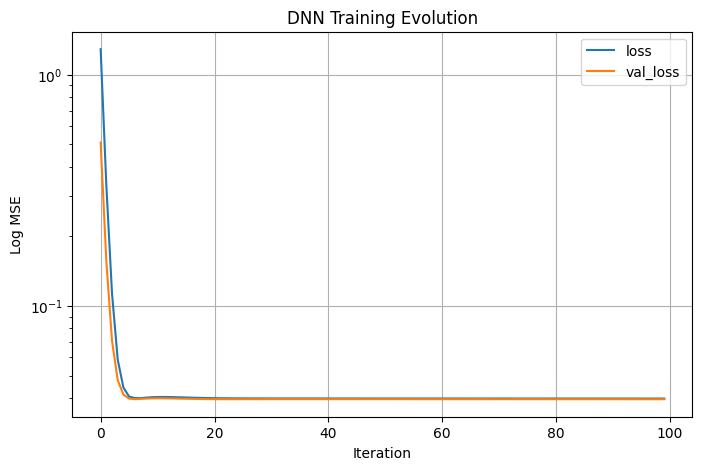

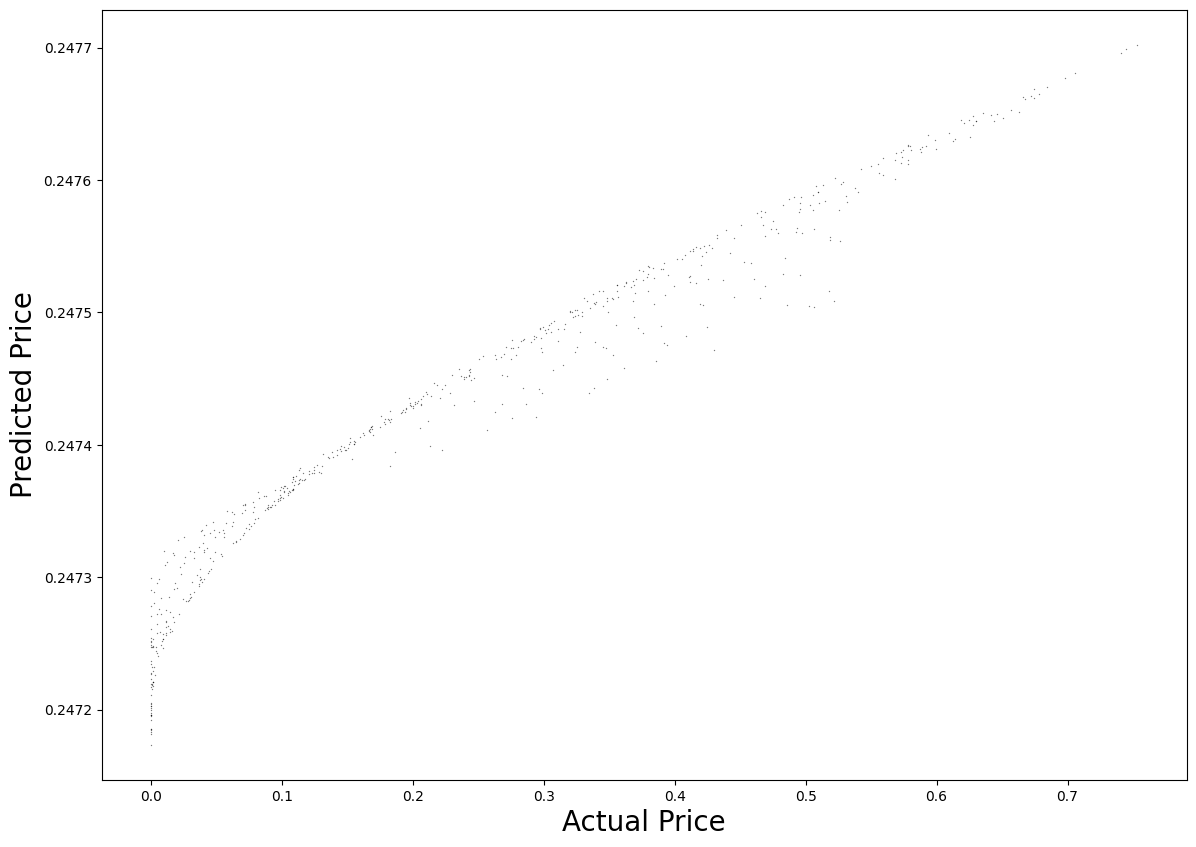

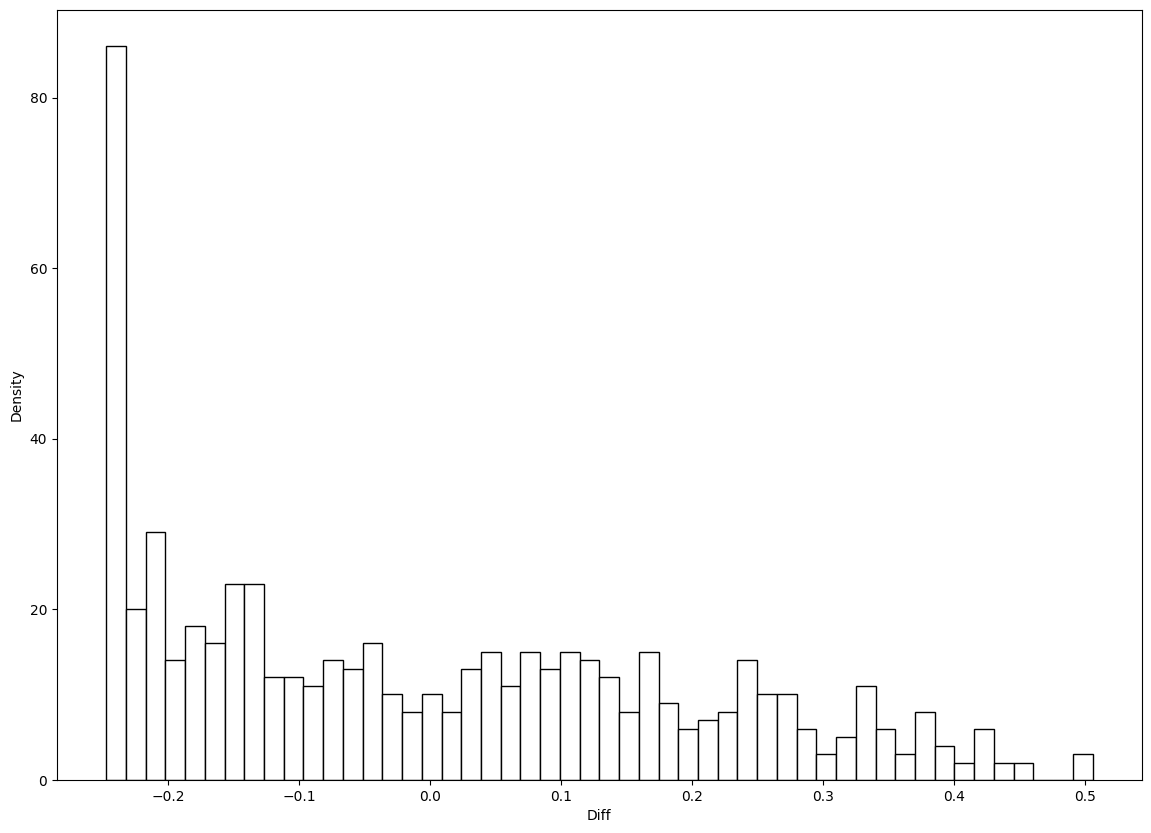

Mean Squared Error:       0.03956955681097971
Root Mean Squared Error:  0.19892098132419242
Mean Absolute Error:      0.17245153428170024
Mean Percent Error:       0.8223701129848586


In [ ]:
y5_test_hat = NeuralNetwork(5, 60, 'sigmoid', 'adam', 100).predict(X_test)

y5_test_hat = np.squeeze(y5_test_hat)

CheckAccuracy_plots(y_test, y5_test_hat)
s = CheckAccuracy_dict(y_test, y5_test_hat)

In [ ]:
deep_5_60_sig = CheckAccuracy_dict(y_test, y5_test_hat)
deep_5_60_sig.pop('diff')
deep_5_60_sig = {'DNN (5, 60, sig)': deep_5_60_sig}
deep_5_60_sig

Mean Squared Error:       0.03956955681097971
Root Mean Squared Error:  0.19892098132419242
Mean Absolute Error:      0.17245153428170024
Mean Percent Error:       0.8223701129848586


{'DNN (5, 60, sig)': {'mse': 0.03956955681097971,
  'rmse': 0.19892098132419242,
  'mae': 0.17245153428170024,
  'mpe': 0.8223701129848586}}

### Comparison of Key Accuracy Stats Across Neural Networks Using Varying Activation Functions

In [ ]:
question2 = {**deep_5_60_relu, **deep_5_60_tanh, **deep_5_60_sig}

df = pd.DataFrame.from_dict(question2)
df

,"DNN (5, 60, Relu)","DNN (5, 60, tanh)","DNN (5, 60, sig)"
mse,0.000026,0.000491,0.039570
rmse,0.005065,0.022163,0.198921
mae,0.003577,0.016687,0.172452
mpe,0.020939,0.091627,0.822370


## Part A: Question 3

### DNN with 5 Layers of 10 Neurons Each (Activation: Relu, Nodes/Layer = 10)

Epoch 1/100
5/5 - 1s - loss: 0.5113 - val_loss: 0.4788 - 1s/epoch - 258ms/step
Epoch 2/100
5/5 - 0s - loss: 0.4450 - val_loss: 0.4130 - 60ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.3813 - val_loss: 0.3533 - 39ms/epoch - 8ms/step
Epoch 4/100
5/5 - 0s - loss: 0.3254 - val_loss: 0.3020 - 59ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.2769 - val_loss: 0.2581 - 39ms/epoch - 8ms/step
Epoch 6/100
5/5 - 0s - loss: 0.2359 - val_loss: 0.2190 - 59ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.1988 - val_loss: 0.1839 - 58ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.1662 - val_loss: 0.1535 - 60ms/epoch - 12ms/step
Epoch 9/100
5/5 - 0s - loss: 0.1388 - val_loss: 0.1281 - 58ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.1159 - val_loss: 0.1077 - 64ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0981 - val_loss: 0.0917 - 55ms/epoch - 11ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0841 - val_loss: 0.0796 - 61ms/epoch - 12ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0741 - v

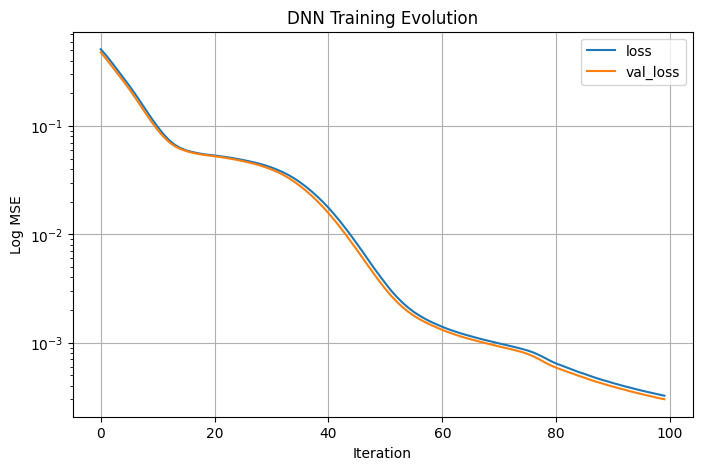

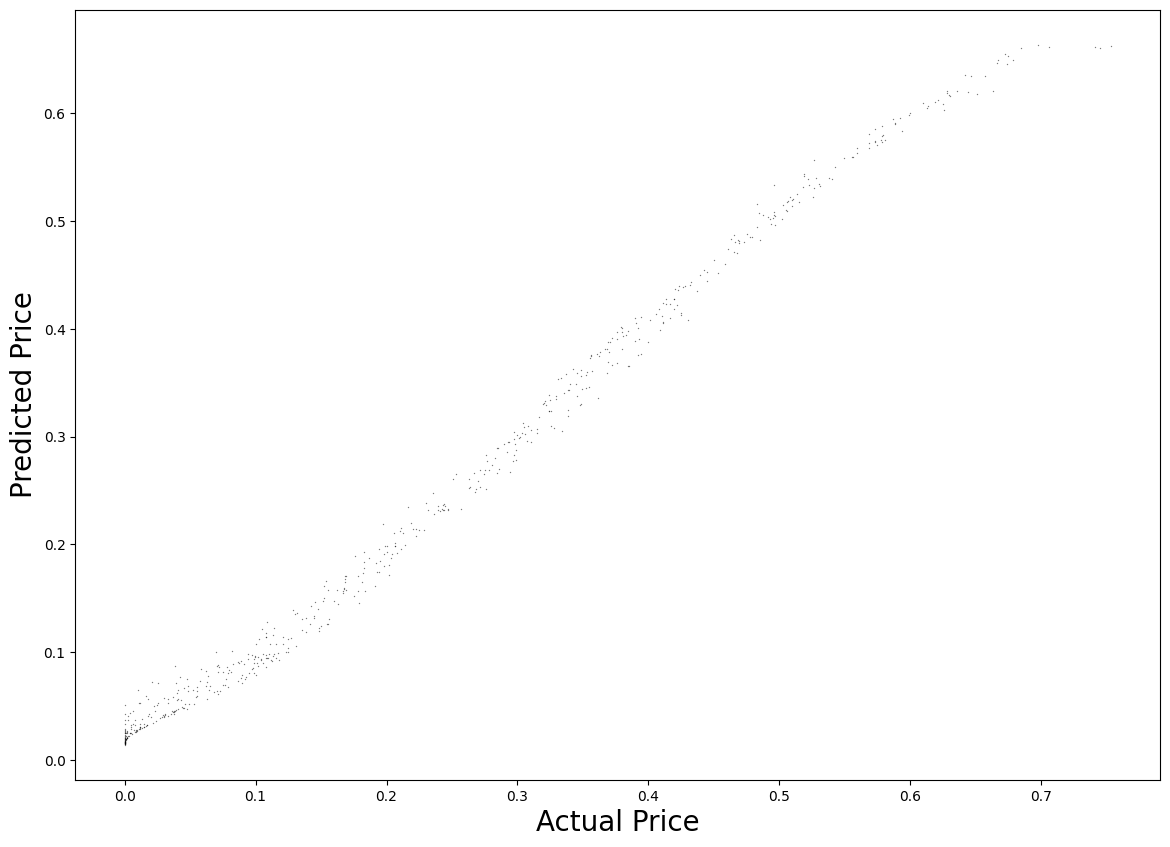

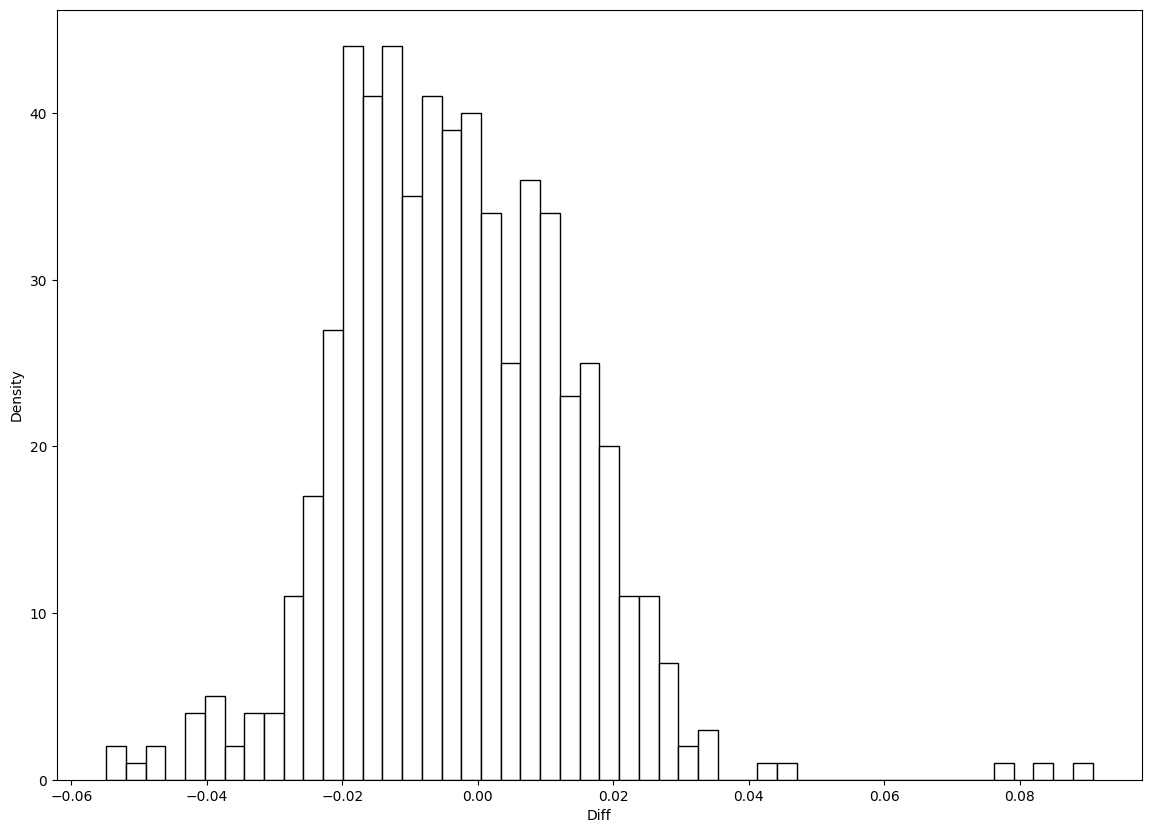

Mean Squared Error:       0.00030026629996751853
Root Mean Squared Error:  0.017328193788376172
Mean Absolute Error:      0.013704569343390089
Mean Percent Error:       0.07163743406406248


In [ ]:
y6_test_hat = NeuralNetwork(5, 10, 'relu', 'adam', 100).predict(X_test)

y6_test_hat = np.squeeze(y6_test_hat)

CheckAccuracy_plots(y_test, y6_test_hat)
s = CheckAccuracy_dict(y_test, y6_test_hat)

In [ ]:
deep_5_10_relu = CheckAccuracy_dict(y_test, y6_test_hat)
deep_5_10_relu.pop('diff')
deep_5_10_relu = {'DNN (5, 10, relu)': deep_5_10_relu}
deep_5_10_relu

Mean Squared Error:       0.00030026629996751853
Root Mean Squared Error:  0.017328193788376172
Mean Absolute Error:      0.013704569343390089
Mean Percent Error:       0.07163743406406248


{'DNN (5, 10, relu)': {'mse': 0.00030026629996751853,
  'rmse': 0.017328193788376172,
  'mae': 0.013704569343390089,
  'mpe': 0.07163743406406248}}

### DNN with 5 Layers of 50 Neurons Each (Activation: Relu, Nodes/Layer = 50)

Epoch 1/100
5/5 - 1s - loss: 0.4921 - val_loss: 0.3670 - 1s/epoch - 259ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2975 - val_loss: 0.2065 - 64ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1592 - val_loss: 0.1037 - 59ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0808 - val_loss: 0.0589 - 63ms/epoch - 13ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0534 - val_loss: 0.0499 - 64ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0515 - val_loss: 0.0526 - 60ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0544 - val_loss: 0.0537 - 59ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0544 - val_loss: 0.0520 - 48ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0522 - val_loss: 0.0497 - 47ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0496 - val_loss: 0.0471 - 45ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0467 - val_loss: 0.0446 - 45ms/epoch - 9ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0442 - val_loss: 0.0423 - 47ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0417 - val

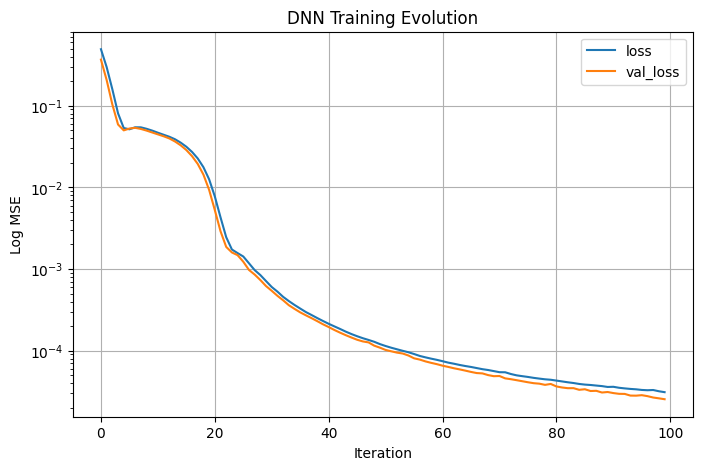

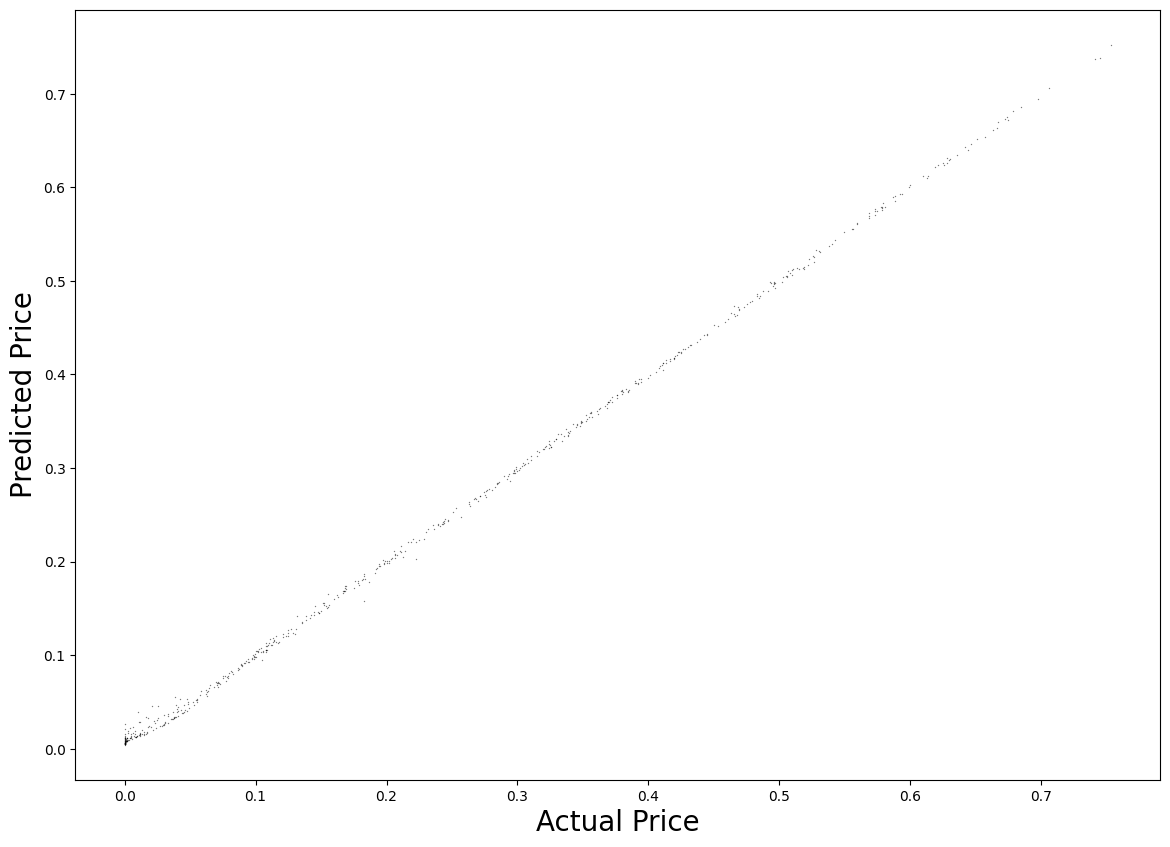

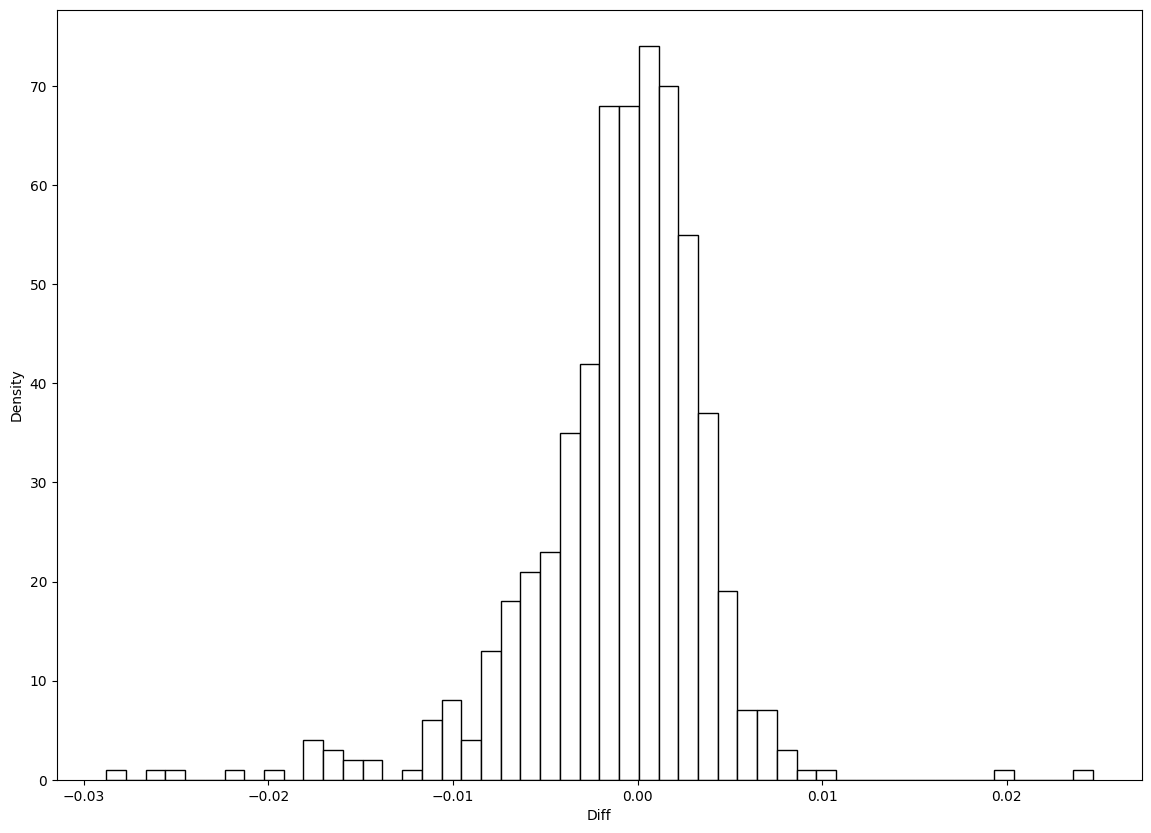

Mean Squared Error:       2.549988581997577e-05
Root Mean Squared Error:  0.005049741163661339
Mean Absolute Error:      0.0034188313920236048
Mean Percent Error:       0.02087641124460618


In [ ]:
y7_test_hat = NeuralNetwork(5, 50, 'relu', 'adam', 100).predict(X_test)

y7_test_hat = np.squeeze(y7_test_hat)

CheckAccuracy_plots(y_test, y7_test_hat)
s = CheckAccuracy_dict(y_test, y7_test_hat)

In [ ]:
deep_5_50_relu = CheckAccuracy_dict(y_test, y7_test_hat)
deep_5_50_relu.pop('diff')
deep_5_50_relu = {'DNN (5, 50, relu)': deep_5_50_relu}
deep_5_50_relu

Mean Squared Error:       2.549988581997577e-05
Root Mean Squared Error:  0.005049741163661339
Mean Absolute Error:      0.0034188313920236048
Mean Percent Error:       0.02087641124460618


{'DNN (5, 50, relu)': {'mse': 2.549988581997577e-05,
  'rmse': 0.005049741163661339,
  'mae': 0.0034188313920236048,
  'mpe': 0.02087641124460618}}

### DNN with 5 Layers of 100 Neurons Each (Activation: Relu, Nodes/Layer = 100)

Epoch 1/100
5/5 - 1s - loss: 0.5555 - val_loss: 0.3983 - 1s/epoch - 256ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3097 - val_loss: 0.1863 - 55ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1286 - val_loss: 0.0693 - 55ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0599 - val_loss: 0.0581 - 57ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0627 - val_loss: 0.0657 - 91ms/epoch - 18ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0683 - val_loss: 0.0659 - 54ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0659 - val_loss: 0.0597 - 59ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0579 - val_loss: 0.0509 - 74ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0491 - val_loss: 0.0449 - 53ms/epoch - 11ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0437 - val_loss: 0.0422 - 54ms/epoch - 11ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0403 - val_loss: 0.0372 - 59ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0350 - val_loss: 0.0318 - 56ms/epoch - 11ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0302 -

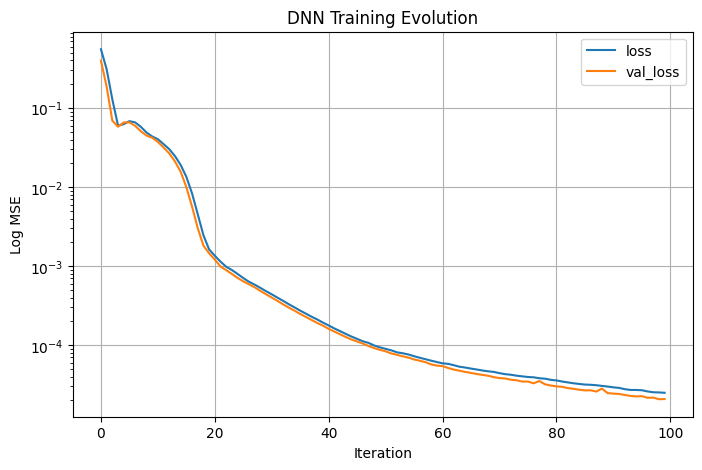

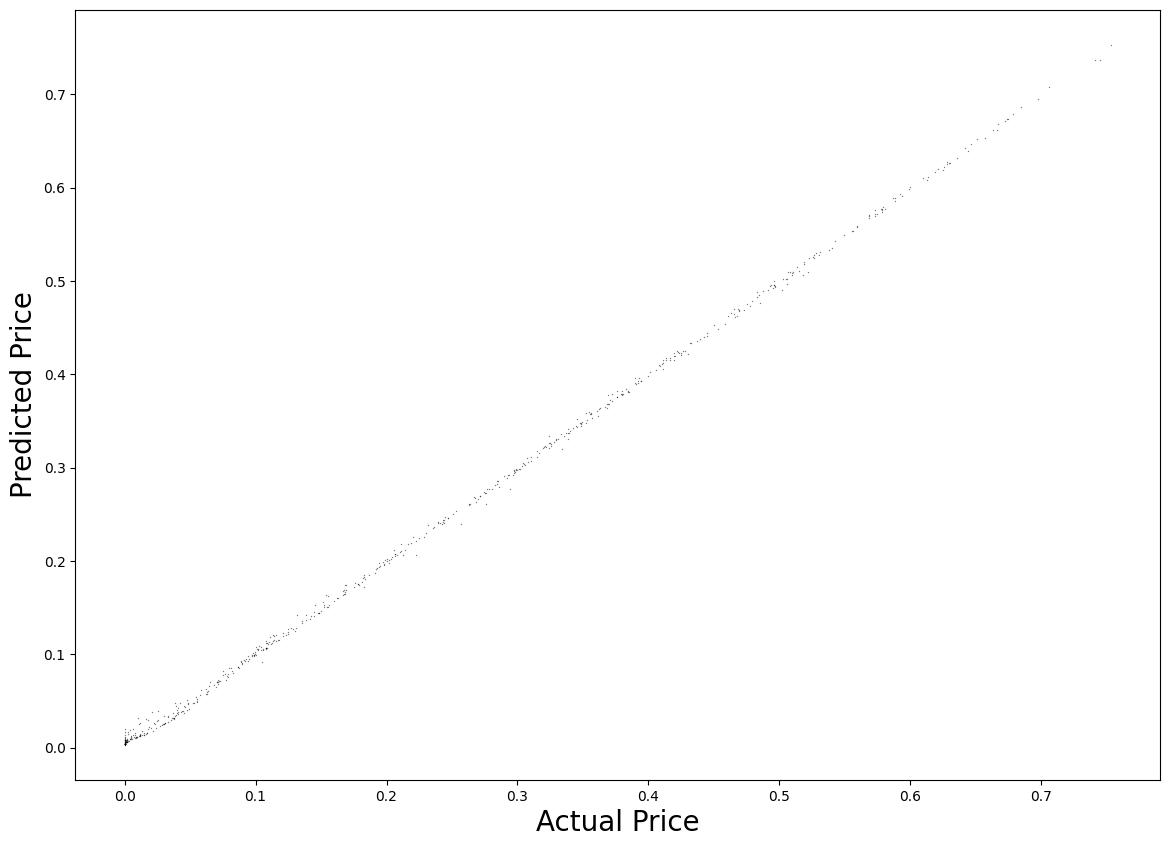

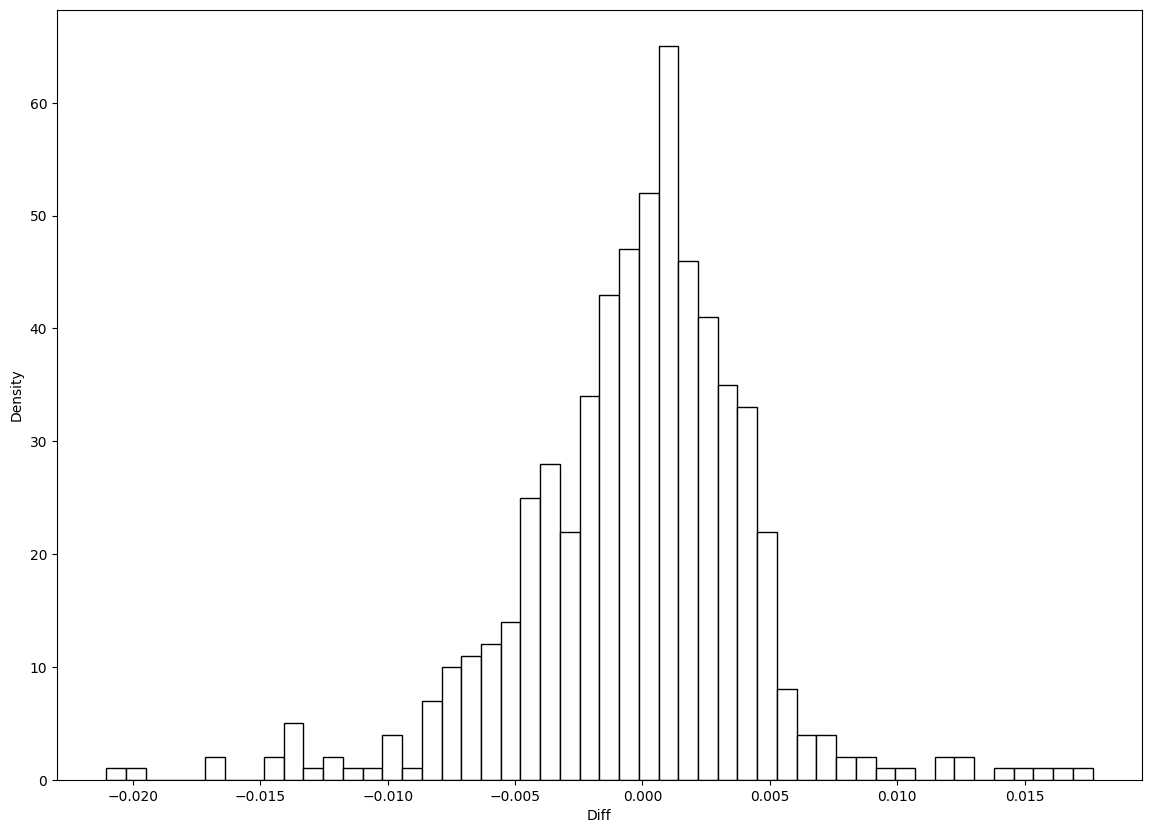

Mean Squared Error:       2.0789831008038838e-05
Root Mean Squared Error:  0.0045595867146089935
Mean Absolute Error:      0.0032695117665806645
Mean Percent Error:       0.018850036917655355


{'diff': array([ 8.14252490e-04,  2.06657594e-03, -2.16064332e-03,  4.19933759e-03,
        -9.19052112e-04,  1.89579388e-03, -1.43213712e-03,  2.76089427e-03,
         3.78603012e-03,  2.58096719e-03,  6.38309602e-04, -1.87504695e-03,
        -1.23727338e-04,  5.63790700e-04,  2.63005749e-03, -3.42151965e-03,
         3.20859381e-03, -4.12654066e-03,  1.60447577e-03, -5.52082443e-03,
         1.05814664e-03,  2.93632059e-03, -2.17181914e-03,  5.05453562e-04,
         7.05422434e-03,  4.71869954e-03,  4.04188674e-03,  8.32049460e-05,
         8.70081816e-04, -3.79760156e-03,  2.57392485e-03, -1.54356784e-03,
         7.04184182e-04,  4.49996593e-03, -6.05589353e-04,  3.52837255e-03,
        -3.90290487e-03,  4.74961002e-03,  4.39520623e-04,  5.22483577e-03,
        -4.02825151e-03, -7.57196449e-04,  2.37694169e-03, -2.19331578e-03,
         3.52625298e-03,  1.58535480e-03, -4.67919327e-03, -3.12583775e-03,
         3.64787879e-03,  8.30946130e-07, -7.40783941e-04, -2.21958139e-03,
    

In [ ]:
y8_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 100).predict(X_test)

y8_test_hat = np.squeeze(y8_test_hat)

CheckAccuracy_plots(y_test, y8_test_hat)
CheckAccuracy_dict(y_test, y8_test_hat)

In [ ]:
deep_5_100_relu = CheckAccuracy_dict(y_test, y8_test_hat)
deep_5_100_relu.pop('diff')
deep_5_100_relu = {'DNN (5, 100, relu, adam, 100 epochs)': deep_5_100_relu}
deep_5_100_relu

Mean Squared Error:       2.0789831008038838e-05
Root Mean Squared Error:  0.0045595867146089935
Mean Absolute Error:      0.0032695117665806645
Mean Percent Error:       0.018850036917655355


{'DNN (5, 100, relu, adam, 100 epochs)': {'mse': 2.0789831008038838e-05,
  'rmse': 0.0045595867146089935,
  'mae': 0.0032695117665806645,
  'mpe': 0.018850036917655355}}

### Comparison of Key Accuracy Stats for Neural Networks Using Varying Number of Nodes Per Layer

In [ ]:
question3 = {**deep_5_10_relu, **deep_5_50_relu, **deep_5_60_relu}
question3 = {**question3, **deep_5_100_relu}

df = pd.DataFrame.from_dict(question3)
df

,"DNN (5, 10, relu)","DNN (5, 50, relu)","DNN (5, 60, Relu)","DNN (5, 100, relu, adam, 100 epochs)"
mse,0.000300,0.000025,0.000026,0.000021
rmse,0.017328,0.005050,0.005065,0.004560
mae,0.013705,0.003419,0.003577,0.003270
mpe,0.071637,0.020876,0.020939,0.018850


## Part A: Question 4

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 100, rmsprop)

Epoch 1/100
5/5 - 1s - loss: 0.2148 - val_loss: 0.0538 - 941ms/epoch - 188ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0502 - val_loss: 0.0457 - 56ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0433 - val_loss: 0.0376 - 54ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0339 - val_loss: 0.0266 - 54ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0221 - val_loss: 0.0153 - 56ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0176 - val_loss: 0.0086 - 64ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0124 - val_loss: 0.0074 - 54ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0075 - val_loss: 0.0087 - 71ms/epoch - 14ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0081 - val_loss: 0.0047 - 72ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0056 - val_loss: 0.0086 - 69ms/epoch - 14ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0070 - val_loss: 0.0048 - 70ms/epoch - 14ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0049 - val_loss: 0.0072 - 74ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.005

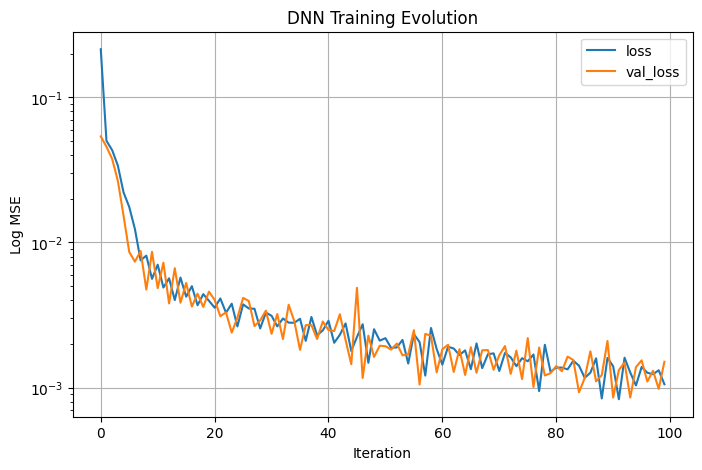

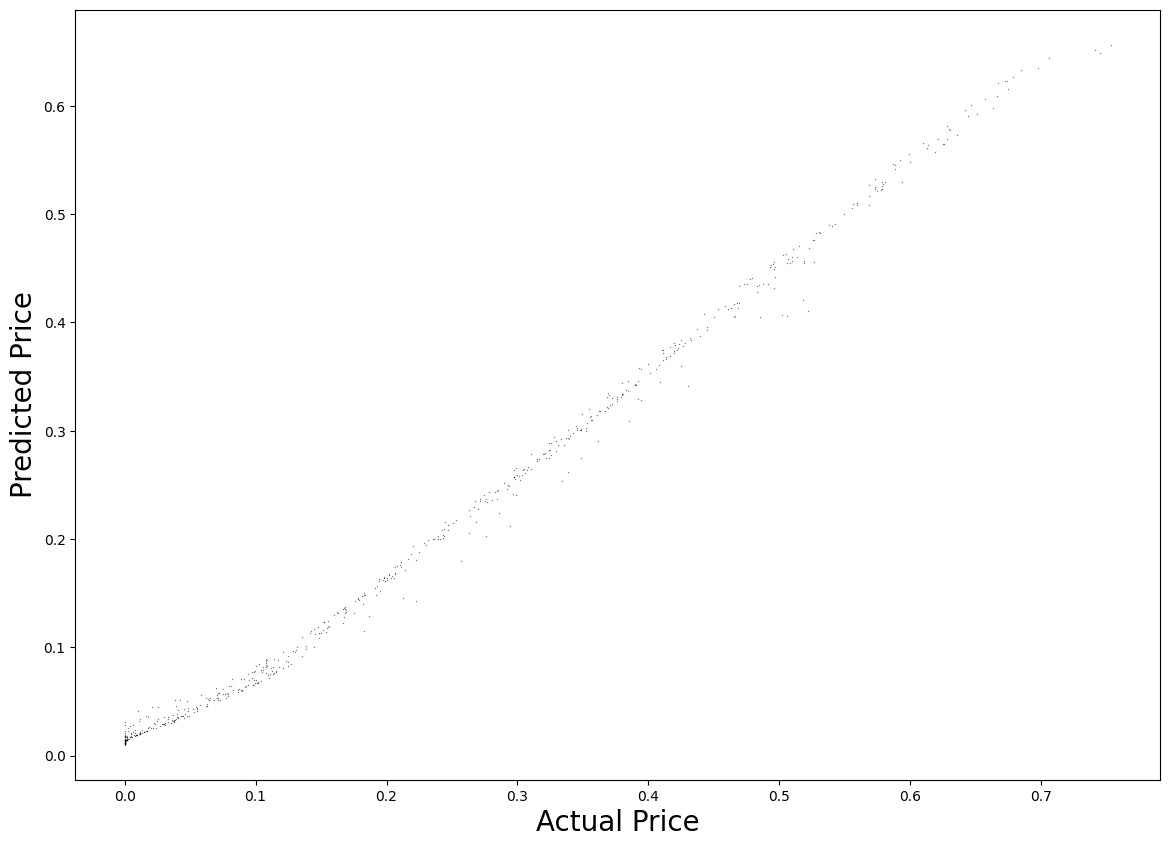

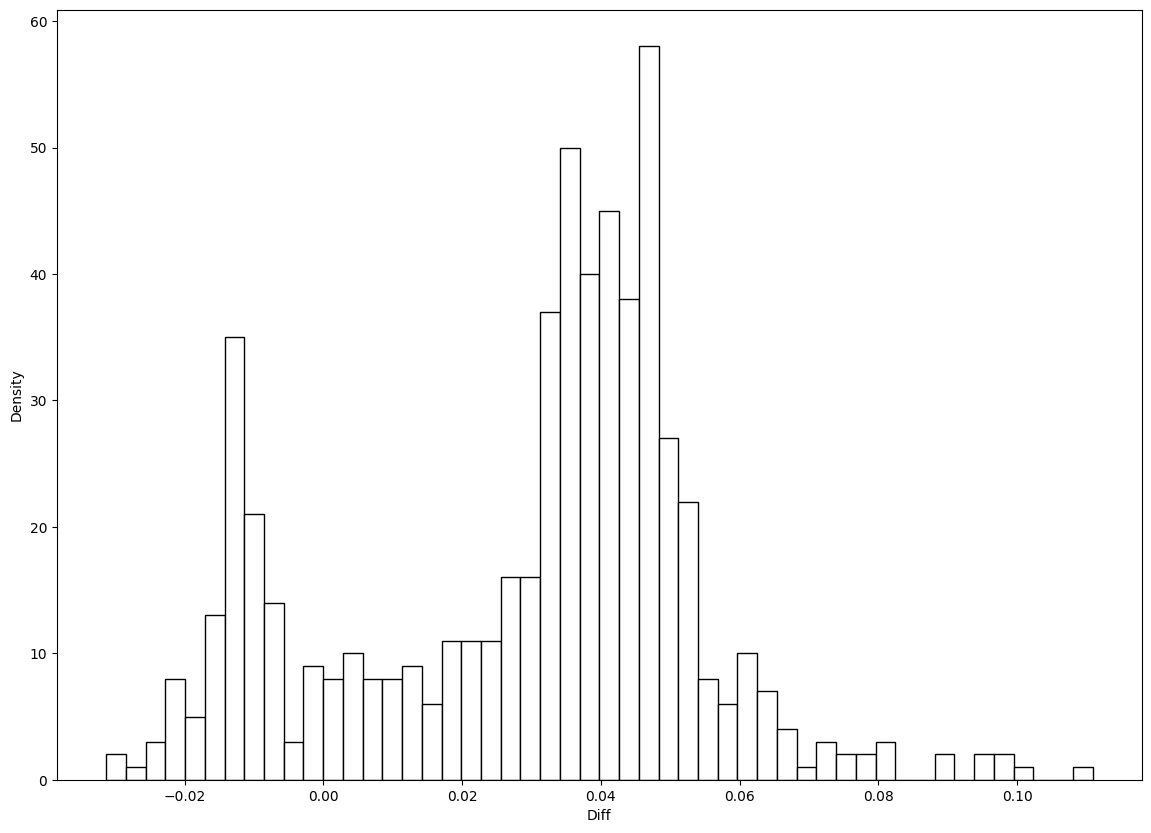

Mean Squared Error:       0.0015049187537393201
Root Mean Squared Error:  0.03879328232747675
Mean Absolute Error:      0.03408916566486327
Mean Percent Error:       0.16037743107001584


In [ ]:
y9_test_hat = NeuralNetwork(5, 100, 'relu', 'rmsprop', 100).predict(X_test)

y9_test_hat = np.squeeze(y9_test_hat)

CheckAccuracy_plots(y_test, y9_test_hat)
s = CheckAccuracy_dict(y_test, y9_test_hat)

In [ ]:
deep_5_100_relu_rms = CheckAccuracy_dict(y_test, y9_test_hat)
deep_5_100_relu_rms.pop('diff')
deep_5_100_relu_rms = {'DNN (5, 100, relu, rms)': deep_5_100_relu_rms}
deep_5_100_relu_rms

Mean Squared Error:       0.0015049187537393201
Root Mean Squared Error:  0.03879328232747675
Mean Absolute Error:      0.03408916566486327
Mean Percent Error:       0.16037743107001584


{'DNN (5, 100, relu, rms)': {'mse': 0.0015049187537393201,
  'rmse': 0.03879328232747675,
  'mae': 0.03408916566486327,
  'mpe': 0.16037743107001584}}

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 100, sgd)

Epoch 1/100
5/5 - 1s - loss: 0.5481 - val_loss: 0.4125 - 808ms/epoch - 162ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3595 - val_loss: 0.3016 - 60ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2709 - val_loss: 0.2384 - 55ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.2167 - val_loss: 0.1950 - 58ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.1787 - val_loss: 0.1637 - 73ms/epoch - 15ms/step
Epoch 6/100
5/5 - 0s - loss: 0.1510 - val_loss: 0.1403 - 70ms/epoch - 14ms/step
Epoch 7/100
5/5 - 0s - loss: 0.1301 - val_loss: 0.1224 - 52ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.1141 - val_loss: 0.1084 - 74ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.1015 - val_loss: 0.0973 - 70ms/epoch - 14ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0915 - val_loss: 0.0884 - 67ms/epoch - 13ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0835 - val_loss: 0.0812 - 70ms/epoch - 14ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0770 - val_loss: 0.0753 - 53ms/epoch - 11ms/step
Epoch 13/100
5/5 - 0s - loss: 0.071

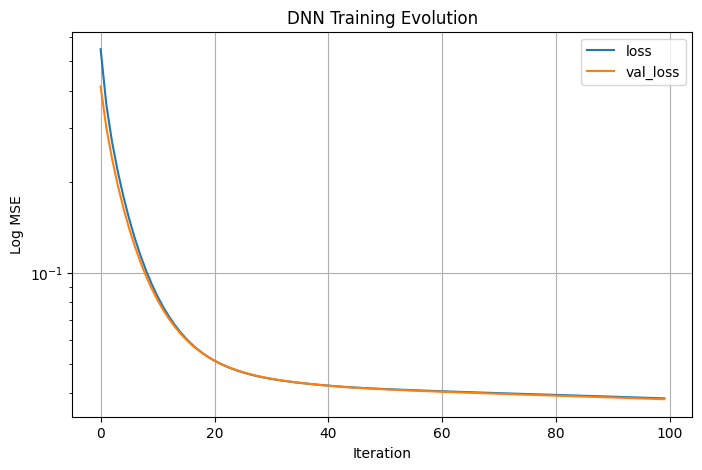

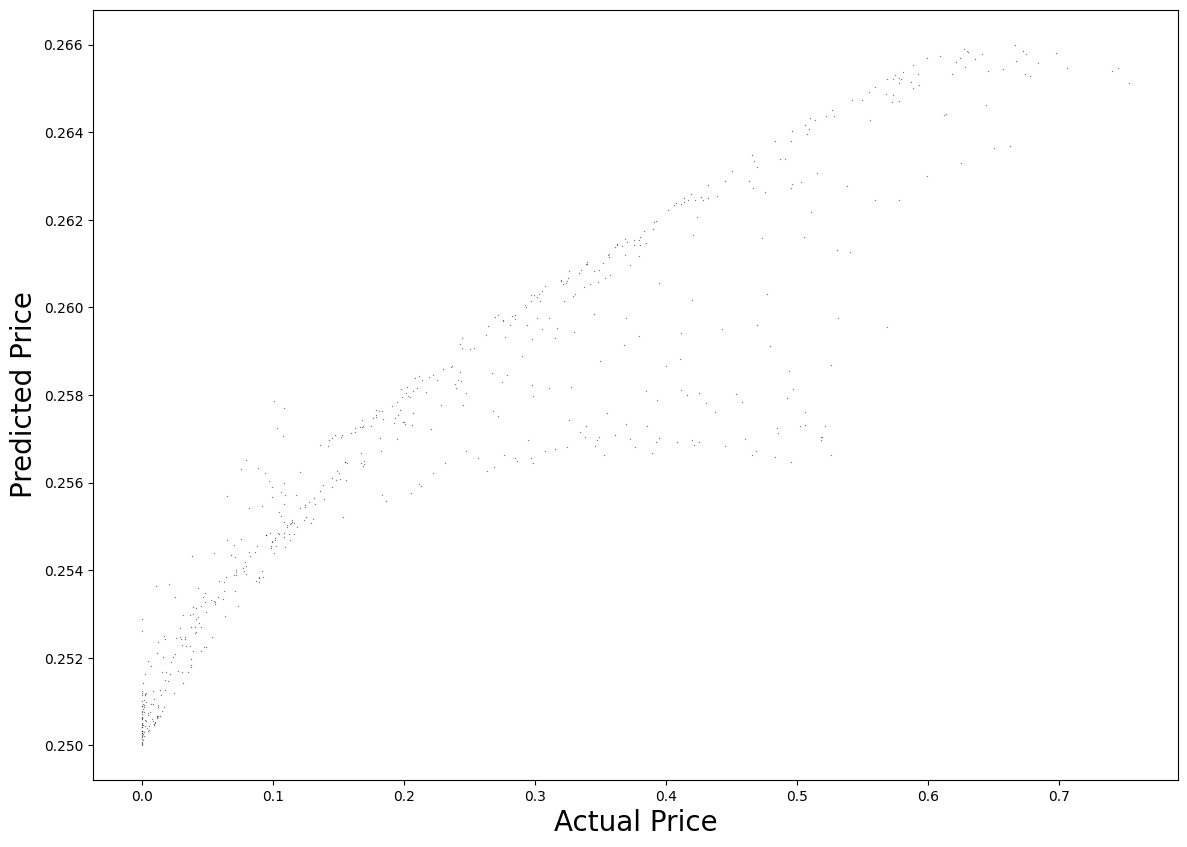

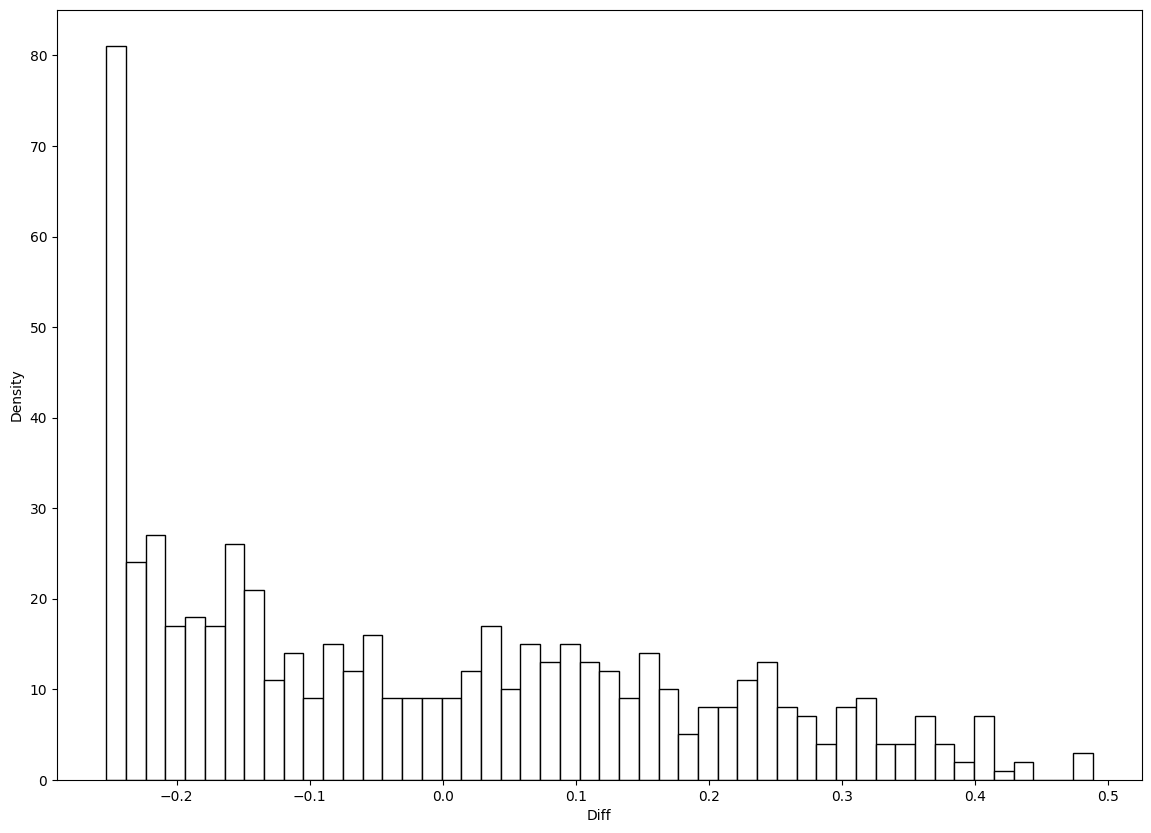

Mean Squared Error:       0.038228105071699825
Root Mean Squared Error:  0.19552008866533338
Mean Absolute Error:      0.17028806972155813
Mean Percent Error:       0.8083102965617877


In [ ]:
y10_test_hat = NeuralNetwork(5, 100, 'relu', 'sgd', 100).predict(X_test)

y10_test_hat = np.squeeze(y10_test_hat)

CheckAccuracy_plots(y_test, y10_test_hat)
s = CheckAccuracy_dict(y_test, y10_test_hat)

In [ ]:
deep_5_100_relu_sgd = CheckAccuracy_dict(y_test, y10_test_hat)
deep_5_100_relu_sgd.pop('diff')
deep_5_100_relu_sgd = {'DNN (5, 100, relu, sgd)': deep_5_100_relu_sgd}
deep_5_100_relu_sgd

Mean Squared Error:       0.038228105071699825
Root Mean Squared Error:  0.19552008866533338
Mean Absolute Error:      0.17028806972155813
Mean Percent Error:       0.8083102965617877


{'DNN (5, 100, relu, sgd)': {'mse': 0.038228105071699825,
  'rmse': 0.19552008866533338,
  'mae': 0.17028806972155813,
  'mpe': 0.8083102965617877}}

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

In [ ]:
question4 = {**deep_5_100_relu, **deep_5_100_relu_rms, **deep_5_100_relu_sgd}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 100, relu, adam, 100 epochs)","DNN (5, 100, relu, rms)","DNN (5, 100, relu, sgd)"
mse,0.000021,0.001505,0.038228
rmse,0.004560,0.038793,0.195520
mae,0.003270,0.034089,0.170288
mpe,0.018850,0.160377,0.808310


## Part A: Question 5

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

Epoch 1/500
5/5 - 1s - loss: 0.4261 - val_loss: 0.2299 - 1s/epoch - 267ms/step
Epoch 2/500
5/5 - 0s - loss: 0.1536 - val_loss: 0.0754 - 71ms/epoch - 14ms/step
Epoch 3/500
5/5 - 0s - loss: 0.0649 - val_loss: 0.0627 - 57ms/epoch - 11ms/step
Epoch 4/500
5/5 - 0s - loss: 0.0677 - val_loss: 0.0701 - 72ms/epoch - 14ms/step
Epoch 5/500
5/5 - 0s - loss: 0.0723 - val_loss: 0.0691 - 56ms/epoch - 11ms/step
Epoch 6/500
5/5 - 0s - loss: 0.0684 - val_loss: 0.0616 - 60ms/epoch - 12ms/step
Epoch 7/500
5/5 - 0s - loss: 0.0592 - val_loss: 0.0524 - 72ms/epoch - 14ms/step
Epoch 8/500
5/5 - 0s - loss: 0.0517 - val_loss: 0.0515 - 71ms/epoch - 14ms/step
Epoch 9/500
5/5 - 0s - loss: 0.0493 - val_loss: 0.0455 - 74ms/epoch - 15ms/step
Epoch 10/500
5/5 - 0s - loss: 0.0436 - val_loss: 0.0409 - 70ms/epoch - 14ms/step
Epoch 11/500
5/5 - 0s - loss: 0.0392 - val_loss: 0.0342 - 73ms/epoch - 15ms/step
Epoch 12/500
5/5 - 0s - loss: 0.0312 - val_loss: 0.0264 - 60ms/epoch - 12ms/step
Epoch 13/500
5/5 - 0s - loss: 0.0227 -

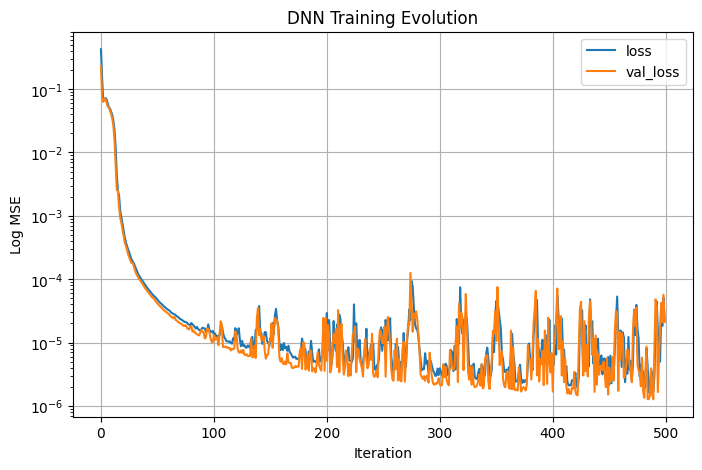

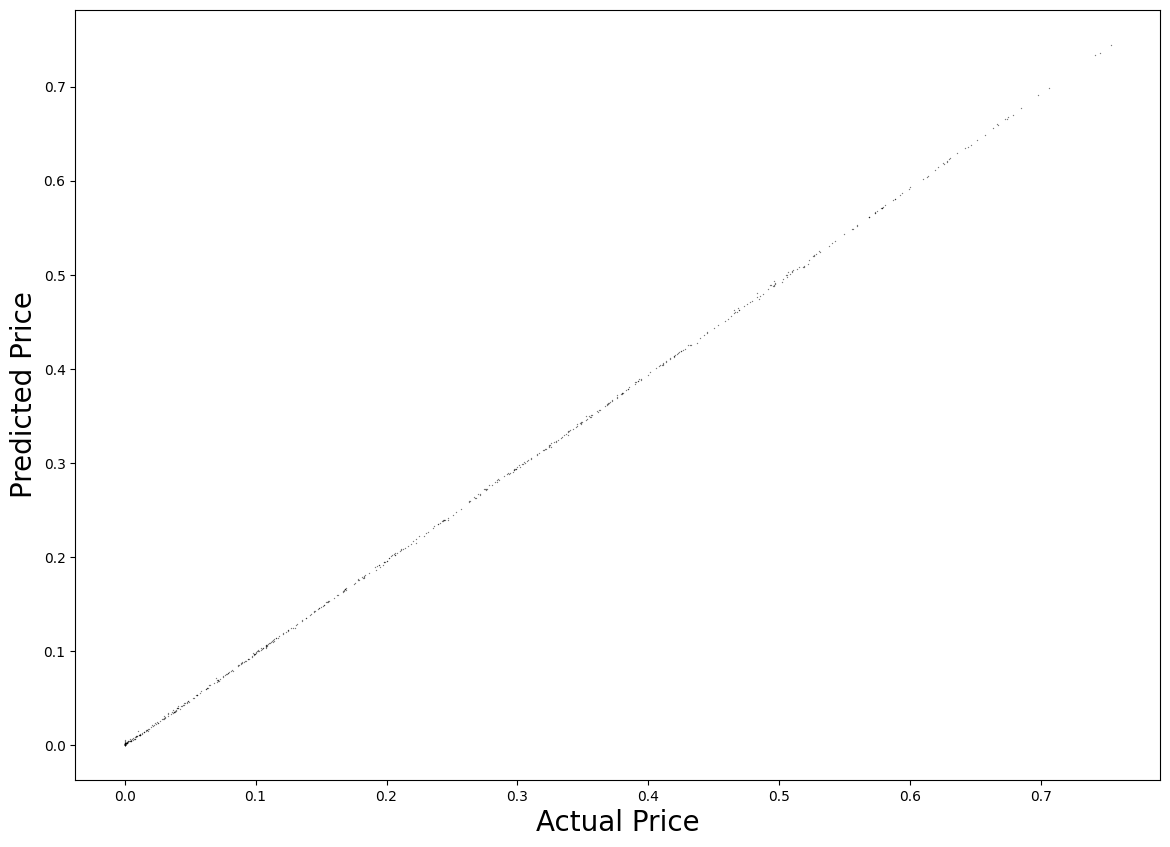

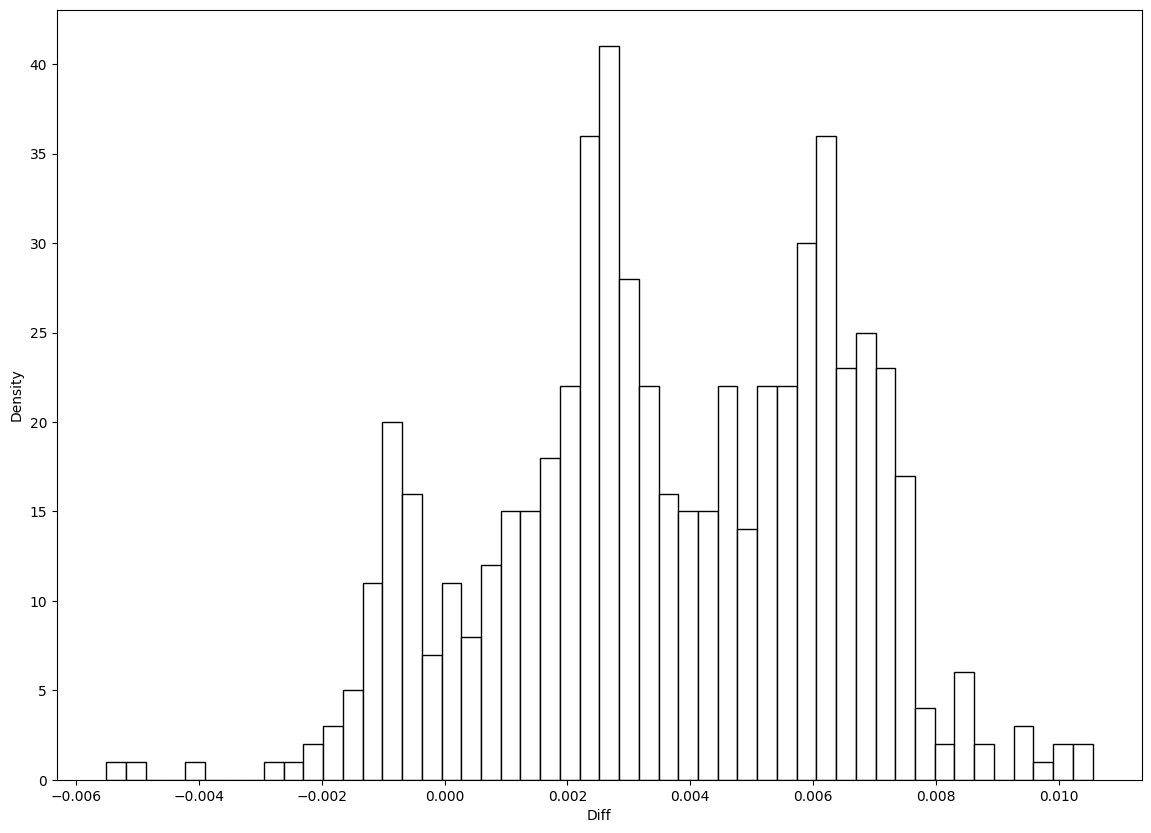

Mean Squared Error:       2.113911952155429e-05
Root Mean Squared Error:  0.004597729822592264
Mean Absolute Error:      0.003935558462289983
Mean Percent Error:       0.019007726427394272


In [ ]:
y11_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 500).predict(X_test)

y11_test_hat = np.squeeze(y11_test_hat)

CheckAccuracy_plots(y_test, y11_test_hat)
s = CheckAccuracy_dict(y_test, y11_test_hat)

In [ ]:
deep_5_100_relu_adam_500 = CheckAccuracy_dict(y_test, y11_test_hat)
deep_5_100_relu_adam_500.pop('diff')
deep_5_100_relu_adam_500 = {'DNN (5, 100, relu, adam, 500 epochs)': deep_5_100_relu_adam_500}
deep_5_100_relu_adam_500

Mean Squared Error:       2.113911952155429e-05
Root Mean Squared Error:  0.004597729822592264
Mean Absolute Error:      0.003935558462289983
Mean Percent Error:       0.019007726427394272


{'DNN (5, 100, relu, adam, 500 epochs)': {'mse': 2.113911952155429e-05,
  'rmse': 0.004597729822592264,
  'mae': 0.003935558462289983,
  'mpe': 0.019007726427394272}}

Epoch 1/1000
5/5 - 1s - loss: 0.4720 - val_loss: 0.2979 - 1s/epoch - 254ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.2039 - val_loss: 0.0921 - 71ms/epoch - 14ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.0681 - val_loss: 0.0574 - 86ms/epoch - 17ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.0638 - val_loss: 0.0684 - 75ms/epoch - 15ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0714 - val_loss: 0.0690 - 71ms/epoch - 14ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0686 - val_loss: 0.0611 - 57ms/epoch - 11ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0580 - val_loss: 0.0487 - 70ms/epoch - 14ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0461 - val_loss: 0.0426 - 80ms/epoch - 16ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0426 - val_loss: 0.0390 - 56ms/epoch - 11ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0346 - val_loss: 0.0282 - 72ms/epoch - 14ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0254 - val_loss: 0.0188 - 71ms/epoch - 14ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0152 - val_loss: 0.0099 - 58ms/epoch - 12ms/step
Epoch 13/1000
5/5 - 0s - l

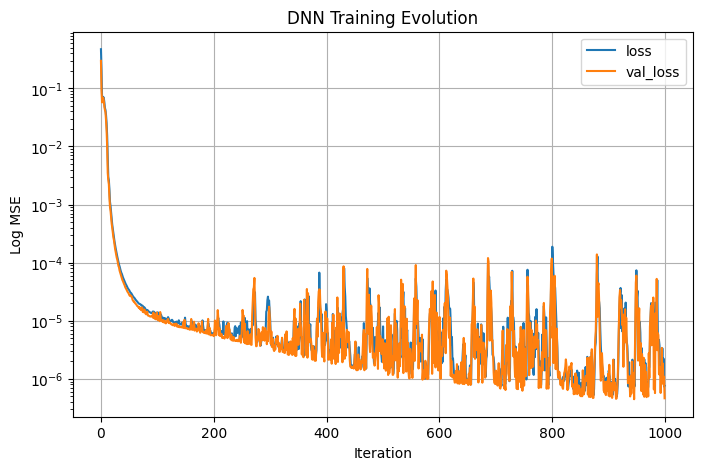

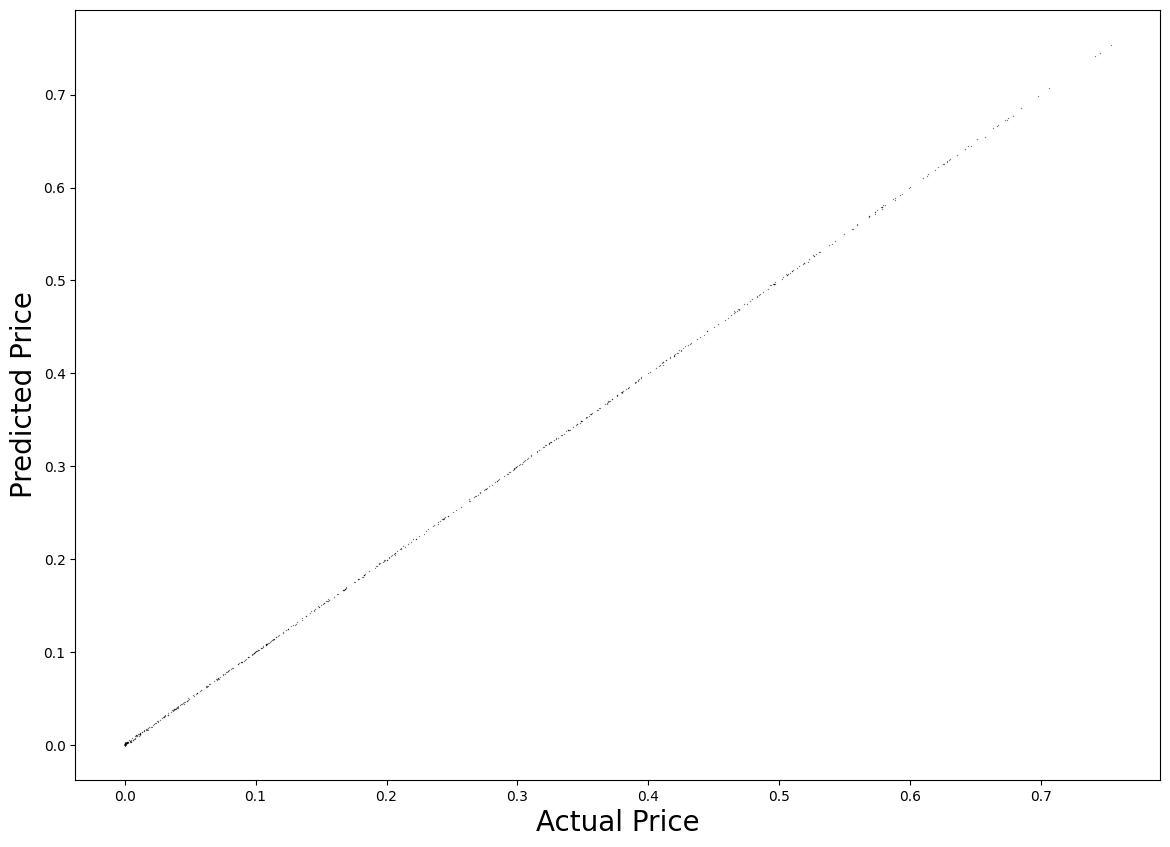

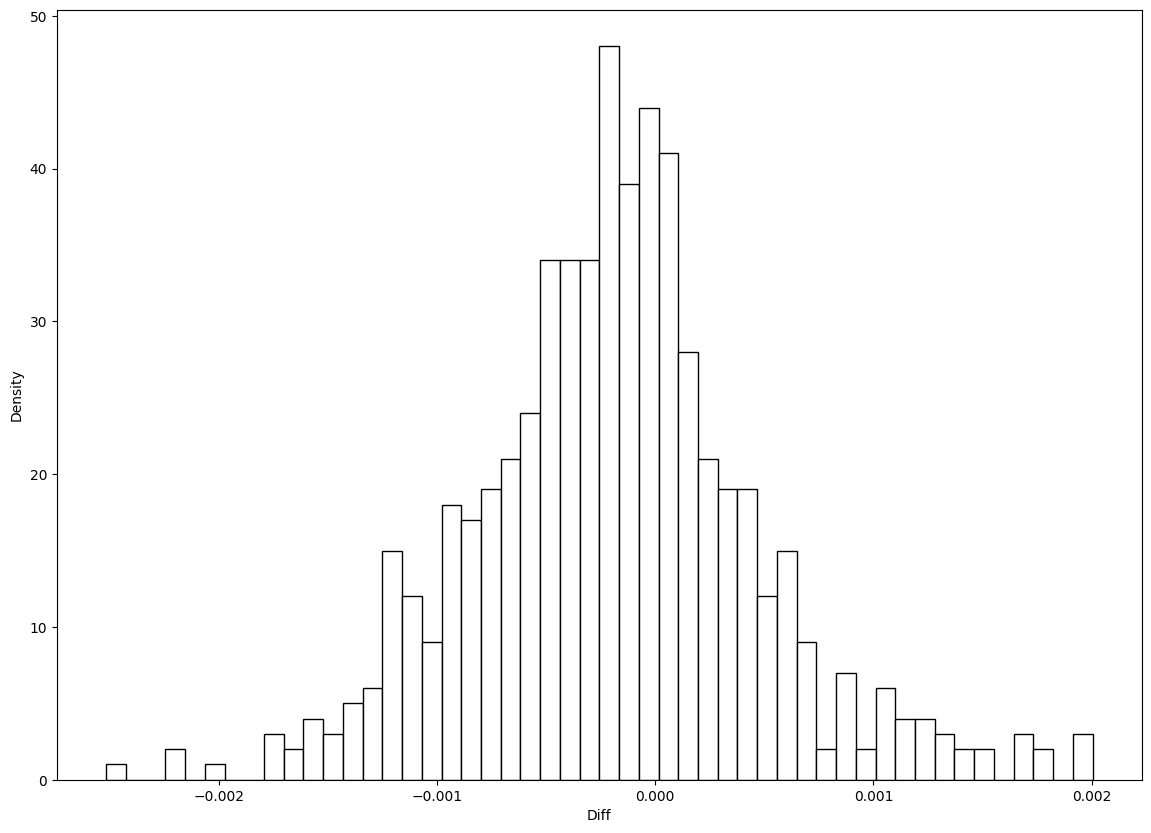

Mean Squared Error:       4.631540746851736e-07
Root Mean Squared Error:  0.0006805542408105129
Mean Absolute Error:      0.0005162826420934724
Mean Percent Error:       0.0028135165239082825


In [ ]:
y12_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 1000).predict(X_test)

y12_test_hat = np.squeeze(y12_test_hat)

CheckAccuracy_plots(y_test, y12_test_hat)
s = CheckAccuracy_dict(y_test, y12_test_hat)

In [ ]:
deep_5_100_relu_adam_1000 = CheckAccuracy_dict(y_test, y12_test_hat)
deep_5_100_relu_adam_1000.pop('diff')
deep_5_100_relu_adam_1000 = {'DNN (5, 100, relu, adam, 1000 epochs)': deep_5_100_relu_adam_1000}
deep_5_100_relu_adam_1000

Mean Squared Error:       4.631540746851736e-07
Root Mean Squared Error:  0.0006805542408105129
Mean Absolute Error:      0.0005162826420934724
Mean Percent Error:       0.0028135165239082825


{'DNN (5, 100, relu, adam, 1000 epochs)': {'mse': 4.631540746851736e-07,
  'rmse': 0.0006805542408105129,
  'mae': 0.0005162826420934724,
  'mpe': 0.0028135165239082825}}

### Comparison of Key Accuracy Stats for Neural Networks Running Varying Epochs

In [ ]:
question4 = {**deep_5_100_relu, **deep_5_100_relu_adam_500, **deep_5_100_relu_adam_1000}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 100, relu, adam, 100 epochs)","DNN (5, 100, relu, adam, 500 epochs)","DNN (5, 100, relu, adam, 1000 epochs)"
mse,0.000021,0.000021,4.631541e-07
rmse,0.004560,0.004598,6.805542e-04
mae,0.003270,0.003936,5.162826e-04
mpe,0.018850,0.019008,2.813517e-03


**Part C**

In [ ]:
option_data = pd.read_csv('Project2_training.csv')
option_data.head()

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price,Call Price
0,1.467892,1,0,0.992653,0.028574,100,0.747693
1,1.258188,1,0,0.995702,0.026482,100,0.580628
2,0.600640,1,0,0.984955,0.029314,100,0.142689
3,1.082254,1,0,0.048974,0.029928,100,0.111967
4,0.992677,1,0,0.120462,0.020081,100,0.053918


Dataset Separation and Scaling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = option_data[['Call Price']]
X = option_data[['Stock Price', 'Maturity', 'Dividends','Volatility','Risk-free','Strike Price']]

# Divide data into training set and test set(note that random seed is set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Divide training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=100)

scaler = StandardScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_vals = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

Defining the Best Model

In [58]:
# The best model, from part A's results, is a DNN with 5 layers, 100 neurons each layer,
# using relu as the activation function, adam as the optimizer, and runs 1000 epochs

model = keras.models.Sequential([Dense(100, activation = "relu", input_shape = (6,)),
                                 Dense(100, activation = "relu"),
                                 Dense(100, activation = "relu"),
                                 Dense(100, activation = "relu"),
                                 Dense(100, activation = "relu")])

model.compile(loss = "mse",optimizer = "Adam")

# Checkpoint function is used here to periodically save a copy of the model.
# Currently it is set to save the best performing model
checkpoint_cb = keras.callbacks.ModelCheckpoint("bs_pricing_model_vFinal.h5", save_best_only = True)

# Early stopping allows you to stop your training early if no improvment is shown after cerain period
# Currently it is set at if no improvement occured in 5000 epochs, at the stop the model will also revert back to the best weight
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 1000, restore_best_weights = True)

# Remark: checkpoint could be redundant here as early stopping function can also help restoring to the best weight
# We put both here just to illustrate different ways to keep the best model

# Training the model:
history=model.fit(X_scaled_train,y_train[:,0], epochs= 1000, verbose = 0, validation_data=(X_scaled_vals,y_val[:,0]),
                 callbacks=[checkpoint_cb,early_stopping_cb])


Show Results:

In [59]:
model = keras.models.load_model("bs_pricing_model_vFinal.h5")

mse_test = model.evaluate(X_scaled_test,y_test[:,0],verbose=0)

print('Nerual network mean squared error on test set:', mse_test)

Nerual network mean squared error on test set: 0.001987663796171546


In [69]:
model_prediction = model.predict(X_scaled_test)
mean_error = np.average(model_prediction.T - y_test[:, 0])
std_error = np.std(model_prediction.T - y_test[:, 0])

mean_error_vs_BS_price = np.average(model_prediction.T - y_test[:, 0])
std_error_vs_BS_price = np.std(model_prediction.T - y_test[:, 0])

BS_mean_error = np.average(y_test[:, 0] - y_test[:, 0])
BS_std_error = np.std(y_test[:, 0] - y_test[:, 0])

print('Black-Scholes Statistics:')
print('Mean error on test set:',BS_mean_error)
print('Standard deviation of error on test set:',BS_std_error)
print(" ")
print('Neural Network Statistics:')
print('Mean error on test set vs. option price with noise:',mean_error)
print('Standard deviation of error on test set vs. option price with noise:',std_error)
print('Mean error on test set vs. BS analytical formula price:',mean_error_vs_BS_price)
print('Standard deviation of error on test set vs. BS analytical formula price:',std_error_vs_BS_price)

19/19 [==============================] - 0s 2ms/step
Black-Scholes Statistics:
Mean error on test set: 0.0
Standard deviation of error on test set: 0.0
 
Neural Network Statistics:
Mean error on test set vs. option price with noise: -0.004920936710624791
Standard deviation of error on test set vs. option price with noise: 0.04431081457035207
Mean error on test set vs. BS analytical formula price: -0.004920936710624791
Standard deviation of error on test set vs. BS analytical formula price: 0.04431081457035207
